# <font color='green'><center><h1>Credit Risk Analysis (XYZ Corporations) </center></font>

 <font color='green'><center><h1>Project Domain-Banking | Task - Predict Defaulters </center></font>

#### <font color='peru'> Load the libraries

In [218]:
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
from sklearn.metrics import accuracy_score # accuracy score / accuracy
from sklearn.metrics import roc_auc_score # roc-auc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 

from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib as mpl  # visualization
import matplotlib.pylab as pylab # visualization
import matplotlib.pyplot as plt # visualization
import pandas as pd # EDA
import numpy as np # EDA
import warnings # EDA
import sklearn # machine learning
from sklearn import preprocessing # EDA
import seaborn as sns

#### <font color='peru'> Code to see outputs for more than one command given together

In [188]:
# code to see the output of multiple lines of codes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### <font color='peru'> Code to see all the columns of the dataset at the same time

In [189]:
# list out the all the columns on the dataset
pd.set_option('display.max_columns',None)

#### <font color='peru'>Import the dataset

In [219]:
bankdata = pd.read_csv('C:/Users/Anju/Desktop/Data science misc/Final project/PythonProject/train.csv')

C:\Users\Anju\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning:

Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.



 <font color='navy'><center><h1>Exploratory Data Analysis </center></font>

In [89]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null int64
funded_amnt                    855969 non-null int64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan               

In [90]:
bankdata.describe()    # Gives the descriptive statistics of all the numeric columns.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [103]:
bankdata.shape  # Gives the number of rows and columns.

(855969, 73)

In [92]:
bankdata.shape[1]   # Gives the count of columns.

73

In [9]:
bankdata.shape[0]    # Gives the count of rows

855969

In [93]:
bankdata.columns    # gives the column details.

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [11]:
bankdata.head()   # returns the first few rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,01-01-1985,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-2015,171.62,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,01-04-1999,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-04-2013,119.66,NaN,01-09-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0,01-11-2001,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-06-2014,649.91,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,01-02-1996,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-2015,357.48,NaN,01-01-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,01-01-1996,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-2016,67.79,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<font color = 'brown'><i>*Analysing the predictor variable - 'default_ind'</i></font>

In [12]:
bankdata['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

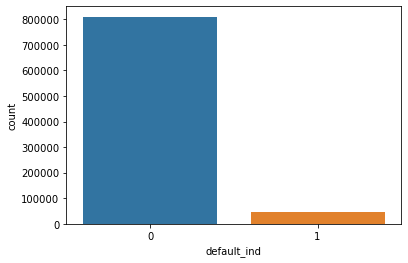

In [13]:
sns.countplot('default_ind',data=bankdata)

 <font color='navy'><center><h1>Interactive Report of bankdata</center></font>

In [14]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport

In [42]:
pp.ProfileReport(bankdata)

 <font color='navy'><center><h1>Data Cleansing</center></font>

#### <font color='peru'> Finding the unique columns and dropping them as they add no value to the problem

In [15]:
def check_unique_data(df):
    flag=df.nunique().any()
    if flag==True:
        total = df.nunique()
        percent = ((df.nunique())/(df.shape[0]))*100
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [16]:
check_unique_data(bankdata)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
Total,855969,855969,1368,1368,8818,2,520,67349,7,35,290912,11,6,48163,3,103,2,120335,14,60991,931,51,4074,29,697,9,155,123,77,31,72779,1338,134,2,236739,254328,493510,494744,250385,317683,5320,22627,20386,97,230321,3,102,12,167,1,2,283,390,3,8,10138,322286,11,34,12,16,188,11099,1195,15,25,8114,1077,20793,16,27,27,2
Percent,100,100,0.159819,0.159819,1.03018,0.000233653,0.0607499,7.86816,0.000817787,0.00408893,33.9863,0.00128509,0.00070096,5.62672,0.00035048,0.0120331,0.000233653,14.0583,0.00163557,7.12537,0.108766,0.00595816,0.475952,0.00338797,0.0814282,0.00105144,0.0181081,0.0143697,0.00899565,0.00362163,8.50253,0.156314,0.0156548,0.000233653,27.6574,29.7123,57.6551,57.7993,29.2516,37.1138,0.621518,2.64344,2.38163,0.0113322,26.9076,0.00035048,0.0119163,0.00140192,0.0195101,0.000116827,0.000233653,0.0330619,0.0455624,0.00035048,0.000934613,1.18439,37.6516,0.00128509,0.00397211,0.00140192,0.00186923,0.0219634,1.29666,0.139608,0.0017524,0.00292067,0.947932,0.125822,2.42918,0.00186923,0.00315432,0.00315432,0.000233653
Types,int64,int64,int64,int64,float64,object,float64,float64,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,float64,int64,object,int64,float64,float64,int64,int64,int64,float64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,object,float64,float64,int64,object,float64,float64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [104]:
# dropping the irrevelant columns
bankdata = bankdata.drop(['id','member_id'], axis=1)

In [105]:
bankdata.shape

(855969, 71)

#### <font color='peru'> Finding missing values and dealing with them.

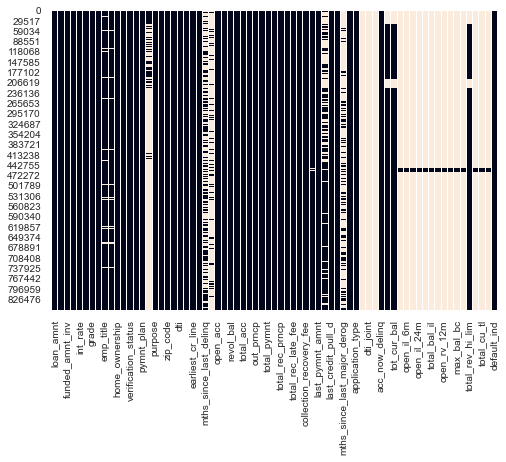

In [19]:
#Plotting the missing values.
import seaborn as sns
sns.heatmap(bankdata.isnull(), cbar=False)

In [20]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

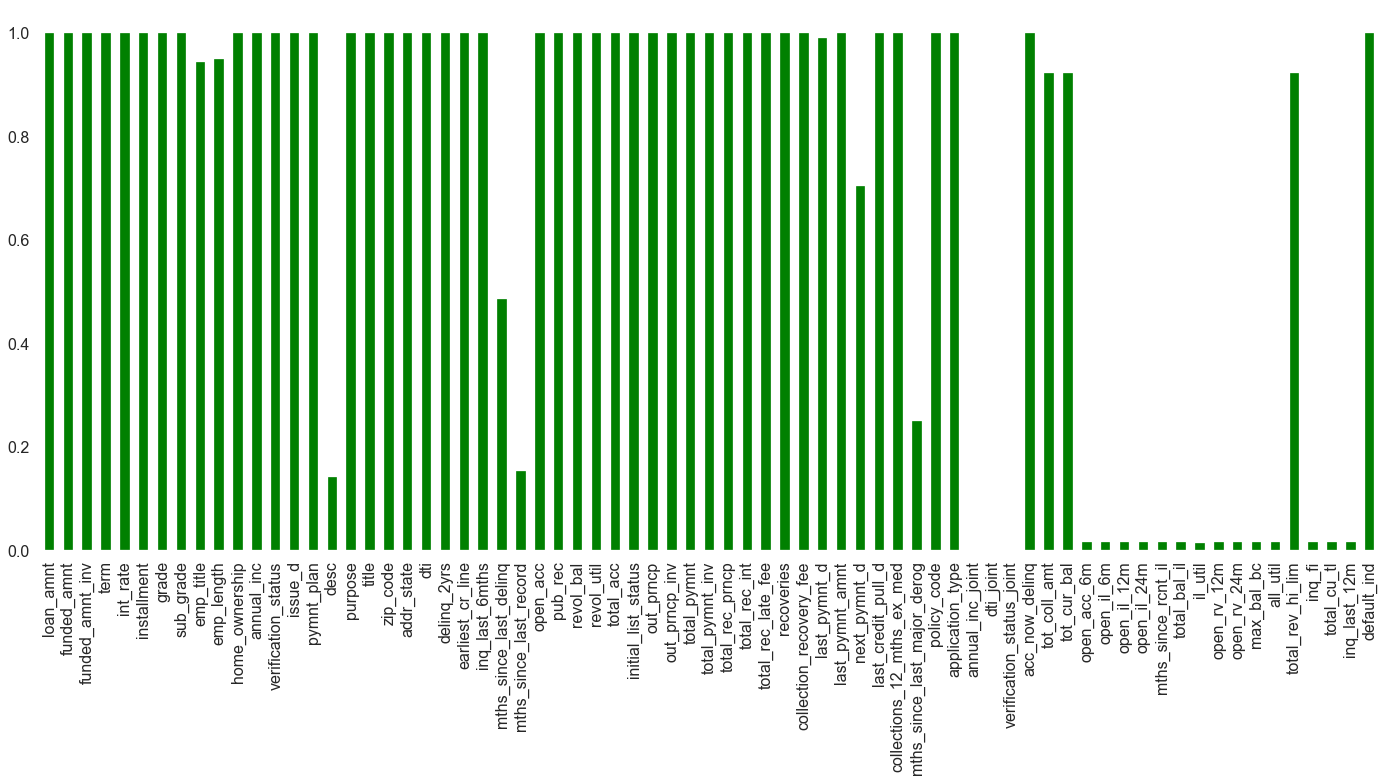

In [22]:
import missingno as msno
msno.bar(bankdata,labels=bankdata.columns,fontsize=16,color='green' )

<font color = 'brown'><i>*Missing values function</i></font>

In [23]:
#First checking for missing values if any exists
flag=bankdata.isna().sum().any()
flag

True

In [68]:
# define the function to identify the missing data values
# and display only those columns in which values are missing

def check_missing_data(df):
    missing_data = df.columns[df.isnull().any()]
    df_temp = df[missing_data]
    flag=df_temp.isna().sum().any()
    if flag==True:
        total = df_temp.isnull().sum()
        percent = (df_temp.isnull().sum()/(df_temp.isnull().count())*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df_temp.columns:
            dtype = str(df_temp[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(output)
    else:
        return(print('No missing value found'))

In [69]:
bankdata_miss = check_missing_data(bankdata)
bankdata_miss

,Total,Percent,Types
emp_title,49443,5.776261,object
emp_length,43061,5.030673,object
desc,734157,85.769111,object
title,33,0.003855,object
mths_since_last_delinq,439812,51.381767,float64
mths_since_last_record,724785,84.674211,float64
revol_util,446,0.052105,float64
last_pymnt_d,8862,1.035318,object
next_pymnt_d,252971,29.553757,object
last_credit_pull_d,50,0.005841,object


In [26]:
# No of true counts gives no of columns with more than 60% missing values.

bankdata_missingsixty = (bankdata_miss['Percent'] >= 60)
bankdata_missingsixty.value_counts()

True     20
False    12
Name: Percent, dtype: int64

In [27]:
bankdata_missingsixty_values = bankdata_miss[bankdata_missingsixty]
np.transpose(bankdata_missingsixty_values)

,desc,mths_since_last_record,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
Total,734157,724785,642830,855527,855529,855527,842681,842681,842681,842681,843035,842681,844360,842681,842681,842681,842681,842681,842681,842681
Percent,85.7691,84.6742,75.0997,99.9484,99.9486,99.9484,98.4476,98.4476,98.4476,98.4476,98.489,98.4476,98.6438,98.4476,98.4476,98.4476,98.4476,98.4476,98.4476,98.4476
Types,object,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [28]:
bankdata_missingsixty_values.index    # will give all the columns having missing values > 60%

Index(['desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [106]:
bankdata = bankdata.drop(['desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'], axis=1)

In [107]:
bankdata.shape

(855969, 51)

#### <font color='peru'> Imputing missing values.

In [33]:
# No of true counts gives no of columns with float datatype having less than 60% missing values.

bankdata_missless60_floatdt = (bankdata_miss['Types'] == 'float64') & (bankdata_miss['Percent'] < 60)
bankdata_missless60_floatdt.value_counts()

False    26
True      6
dtype: int64

In [34]:
# getting the name of columns with float datatype having less than 60% missing values.
bankdata_missless60_floatdt1 = bankdata_miss[bankdata_missless60_floatdt]
np.transpose(bankdata_missless60_floatdt1)

,mths_since_last_delinq,revol_util,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
Total,439812,446,56,67313,67313,67313
Percent,51.3818,0.0521047,0.00654229,7.86395,7.86395,7.86395
Types,float64,float64,float64,float64,float64,float64


In [108]:
# Loop function to impute missing values for float data type

for i in bankdata.columns:
    if(bankdata[i].dtype == 'float64'):
        bankdata[i] = bankdata[i].fillna(np.mean(bankdata[i]))

In [36]:
# No of true counts gives no of columns with onject datatype having less than 60% missing values.

bankdata_missless60_objectdt = (bankdata_miss['Types'] == 'object') & (bankdata_miss['Percent'] < 60)
bankdata_missless60_objectdt.value_counts()

False    26
True      6
dtype: int64

In [37]:
# Below gives names of columns with object datatype having less than 60% missing values.

bankdata_missless60_objectdt1 = bankdata_miss[bankdata_missless60_objectdt]
np.transpose(bankdata_missless60_objectdt1)

,emp_title,emp_length,title,last_pymnt_d,next_pymnt_d,last_credit_pull_d
Total,49443,43061,33,8862,252971,50
Percent,5.77626,5.03067,0.00385528,1.03532,29.5538,0.00584133
Types,object,object,object,object,object,object


In [109]:
# Loop function to impute missing values for object data type
for i in bankdata.columns:
    if(bankdata[i].dtype == 'object'):
        bankdata[i] = bankdata[i].fillna(bankdata[i].mode()[0])

In [74]:
# Checking the missing flag after imputing all of the missing values.
flag=bankdata.isna().sum().any()
flag

False

In [40]:
bankdata.shape

(855969, 51)

#### <font color='peru'> Detecting outliers.

In [43]:
#df.describe() function gives us all the statistical information like mean,median etc and this can be calculated only for 
#numerical columns.And since outliers can be available only for numerical continuos data.This metod is the best way to find
#them.
bankdata.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.0,855969.000000,8.559690e+05,8.559690e+05,8.559690e+05,855969.000000
mean,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,1.0,0.004944,2.254129e+02,1.397662e+05,3.216357e+04,0.054286
std,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,15.248191,5.308094,0.581585,2.222374e+04,23.805381,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133707,0.0,0.077333,1.006856e+04,1.477618e+05,3.618695e+04,0.226581
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,32.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,1.0,0.000000,0.000000e+00,3.225000e+04,1.475000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,34.149943,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,1.0,0.000000,0.000000e+00,1.005610e+05,2.585000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,34.149943,14.000000,0.000000,2.085700e+04,73.500000,32.000000,13528.800000,13522.510000,10744.803650,10697.33000,8000.000000,2233.980000,0.000000,0.000000,0.000000,849.160000,0.000000,1.0,0.000000,0.000000e+00,1.963730e+05,3.800000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,8.000000,188.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,57777.579870,57777.58000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [44]:
bankdata.describe().columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

C:\Users\Anju\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Text(0.5, 0.98, ' ')

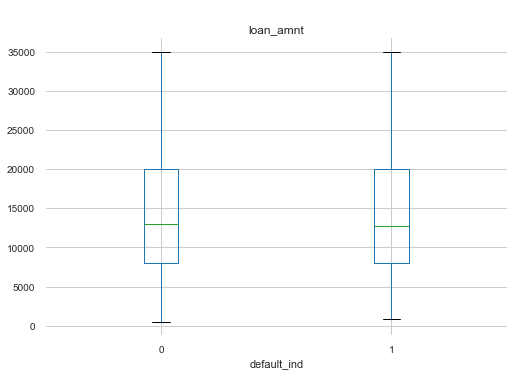

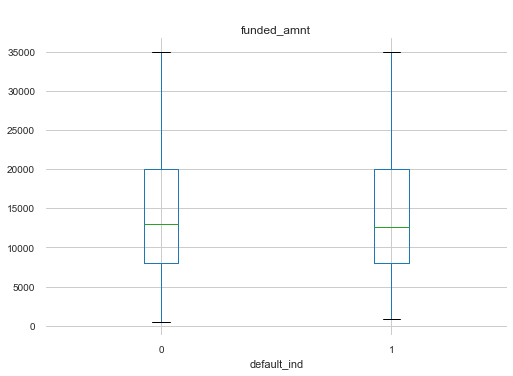

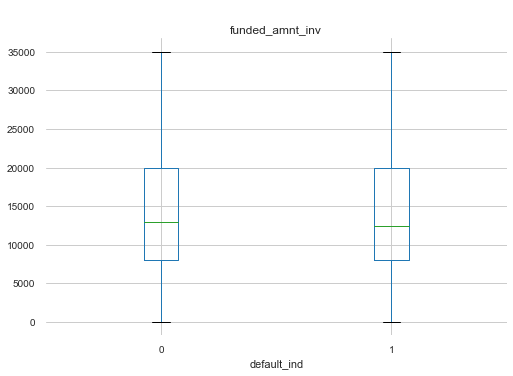

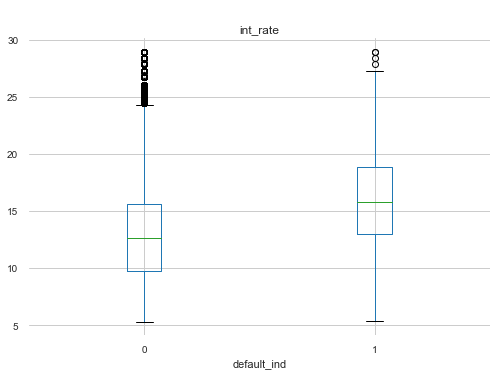

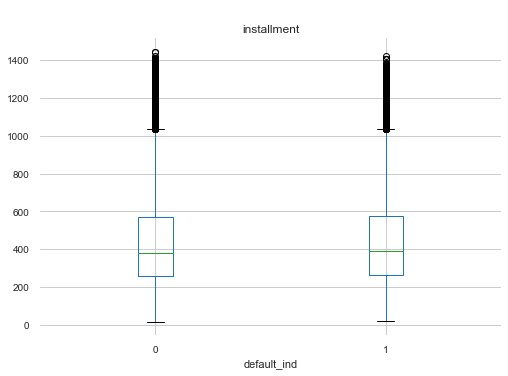

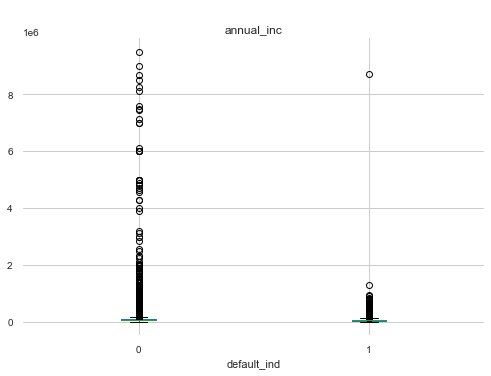

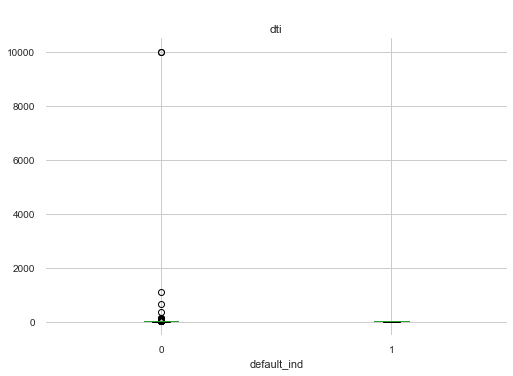

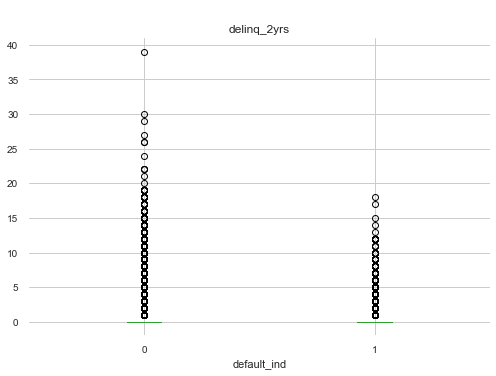

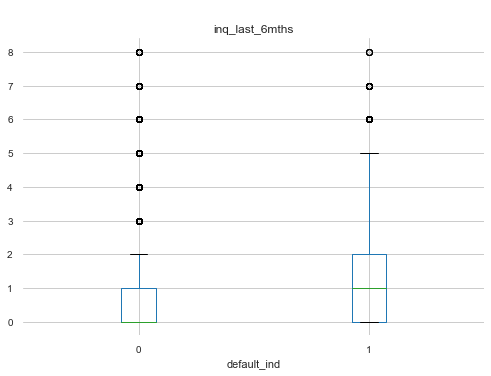

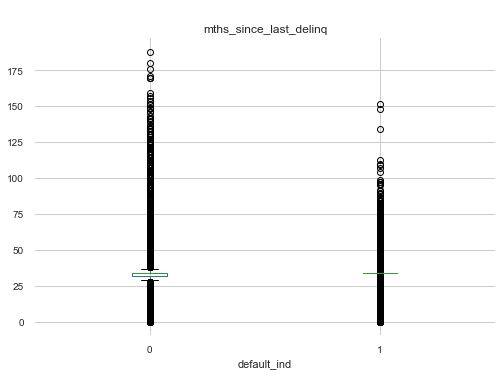

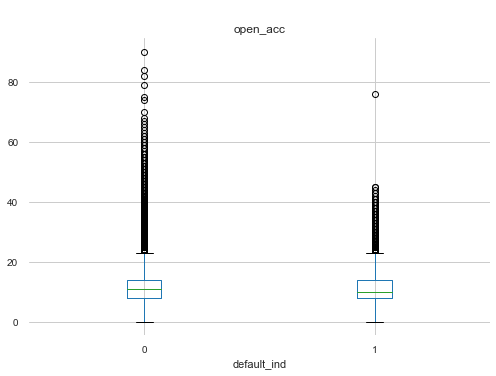

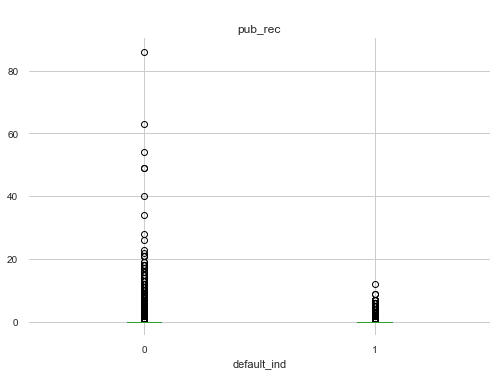

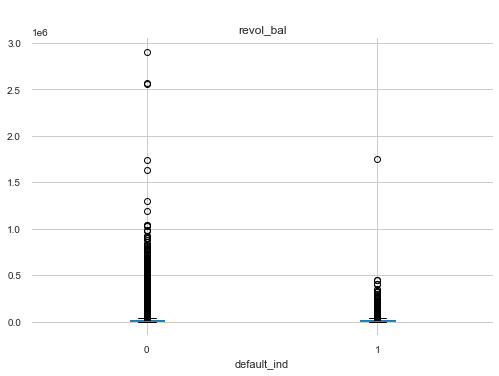

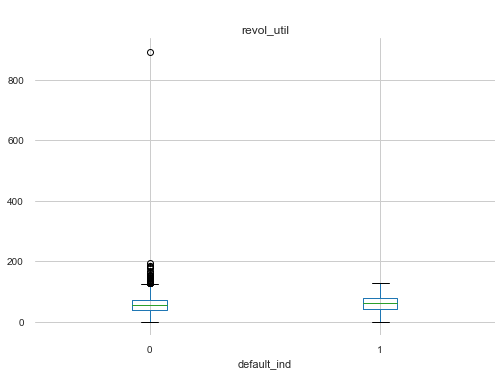

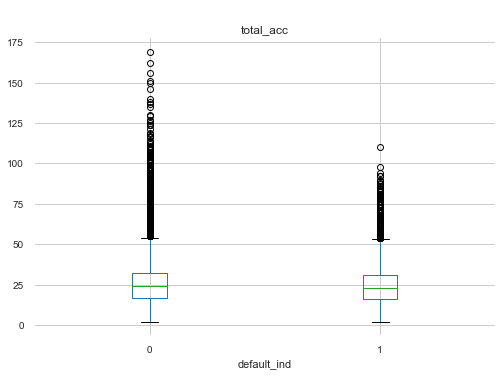

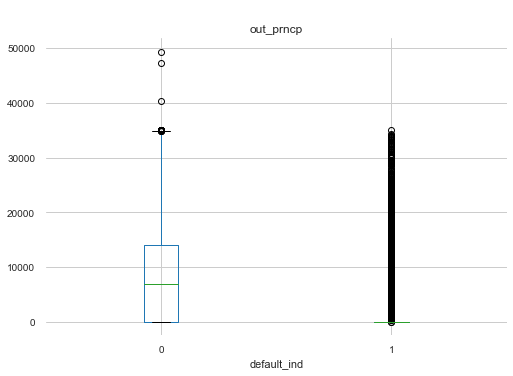

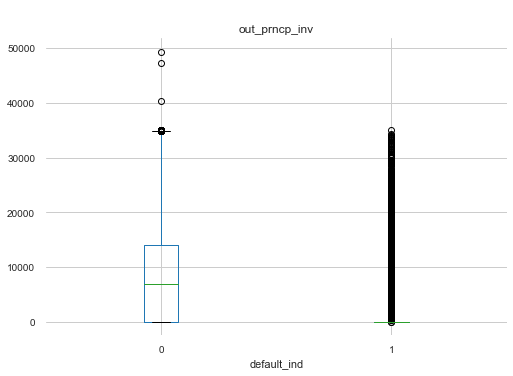

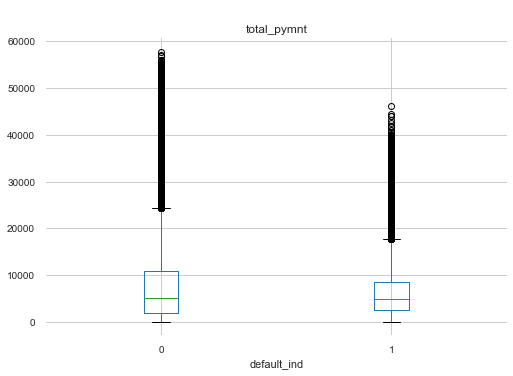

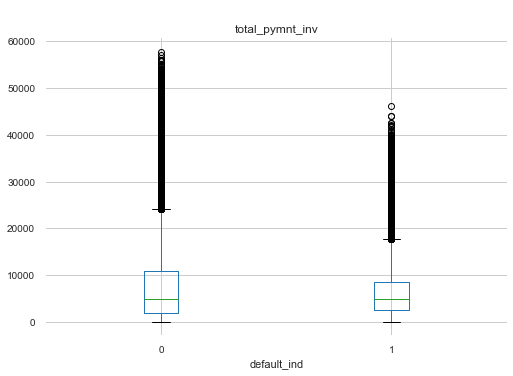

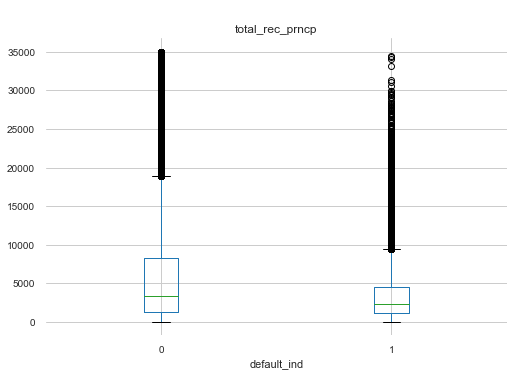

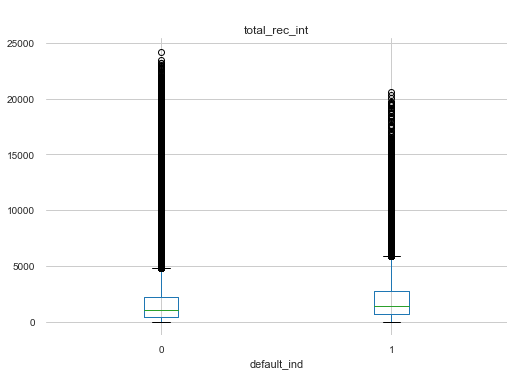

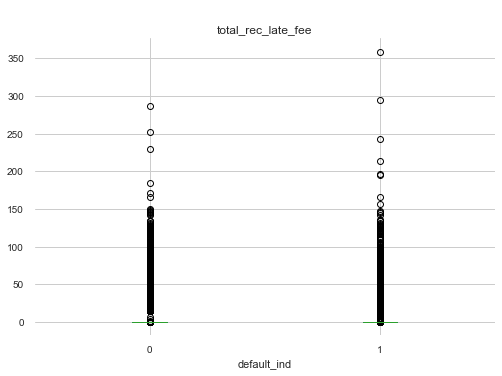

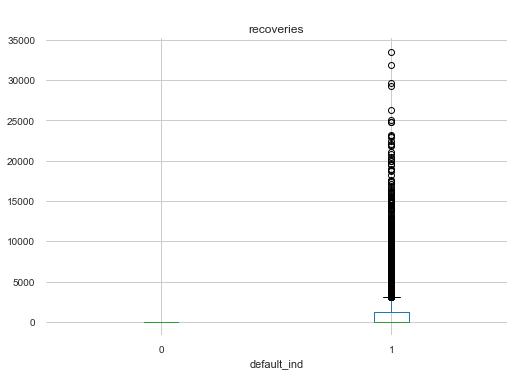

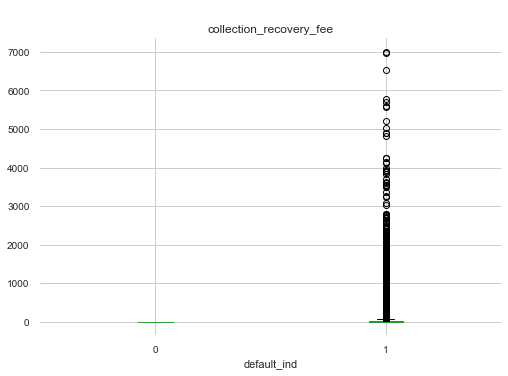

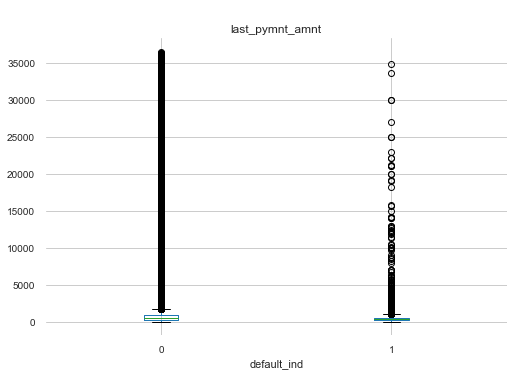

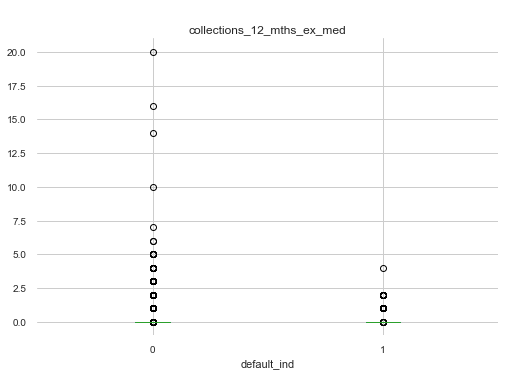

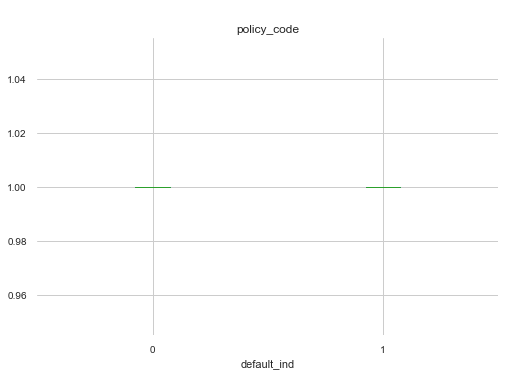

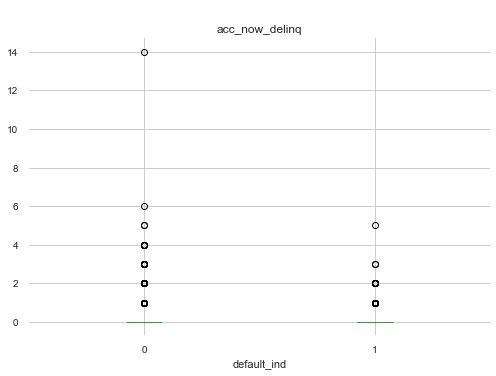

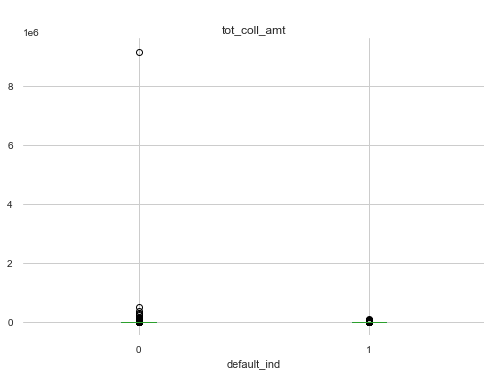

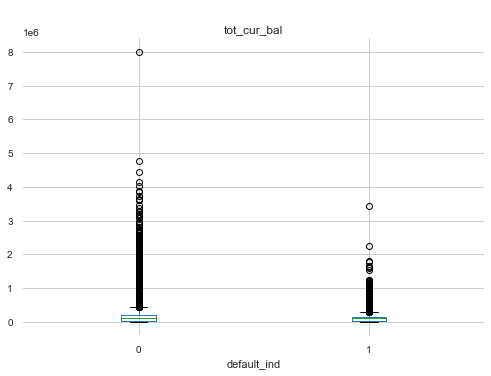

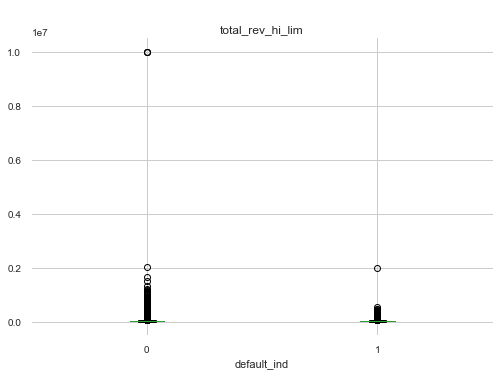

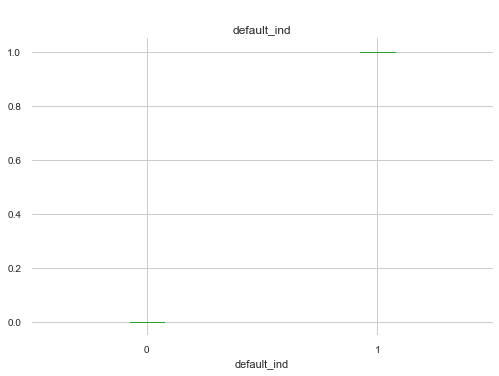

In [110]:
# Checking outliers for numeric column.Below is called multivariate outliers.
#Multivariate- detecting outliers wrt target variable.

col_names = bankdata.describe().columns
for i in col_names:
    bankdata.boxplot(column = i, by='default_ind')  
    plt.suptitle(' ')       # This code will remove the heading "Boxplot grouped by column name".

In [111]:
# Below code gives the IQR
Q1 = bankdata.quantile(0.25)
Q3 = bankdata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt                      12000.000000
funded_amnt                    12000.000000
funded_amnt_inv                12000.000000
int_rate                           6.000000
installment                      311.010000
annual_inc                     45000.000000
dti                               12.020000
delinq_2yrs                        0.000000
inq_last_6mths                     1.000000
mths_since_last_delinq             2.149943
open_acc                           6.000000
pub_rec                            0.000000
revol_bal                      14388.000000
revol_util                        35.900000
total_acc                         15.000000
out_prncp                      13528.800000
out_prncp_inv                  13522.510000
total_pymnt                     8775.113650
total_pymnt_inv                 8737.210000
total_rec_prncp                 6760.050000
total_rec_int                   1782.710000
total_rec_late_fee                 0.000000
recoveries                      

In [112]:
col_names = bankdata.describe()
for i in col_names:
    Q1[i] = bankdata[i].quantile(0.25)
    Q3[i] = bankdata[i].quantile(0.75)
    IQR[i] = Q3[i] - Q1[i]
    print('IQR of bankdata:',i,IQR[i])

IQR of bankdata: loan_amnt 12000.0
IQR of bankdata: funded_amnt 12000.0
IQR of bankdata: funded_amnt_inv 12000.0
IQR of bankdata: int_rate 6.0
IQR of bankdata: installment 311.00999999999993
IQR of bankdata: annual_inc 45000.0
IQR of bankdata: dti 12.019999999999998
IQR of bankdata: delinq_2yrs 0.0
IQR of bankdata: inq_last_6mths 1.0
IQR of bankdata: mths_since_last_delinq 2.149943410780068
IQR of bankdata: open_acc 6.0
IQR of bankdata: pub_rec 0.0
IQR of bankdata: revol_bal 14388.0
IQR of bankdata: revol_util 35.9
IQR of bankdata: total_acc 15.0
IQR of bankdata: out_prncp 13528.8
IQR of bankdata: out_prncp_inv 13522.51
IQR of bankdata: total_pymnt 8775.11365
IQR of bankdata: total_pymnt_inv 8737.21
IQR of bankdata: total_rec_prncp 6760.05
IQR of bankdata: total_rec_int 1782.71
IQR of bankdata: total_rec_late_fee 0.0
IQR of bankdata: recoveries 0.0
IQR of bankdata: collection_recovery_fee 0.0
IQR of bankdata: last_pymnt_amnt 563.74
IQR of bankdata: collections_12_mths_ex_med 0.0
IQR of

In [113]:
# list out the features which have outliers
outliers = ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
            'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 
            'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
            'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
            'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']

#### <font color='maroon'> data capping using the IQR value. IQR is calculated as the difference between the third quartile and first quartile of a column.

In [114]:
# data capping for the outliers on the features based on 1.5 times IQR value
for i in outliers:
    first_qntl = bankdata[i].quantile(0.25)
    third_qntl = bankdata[i].quantile(0.75)
    
    IQR = third_qntl - first_qntl

    for j in range(len(bankdata)):
        if bankdata[i][j] < (first_qntl - 1.5 * IQR):
            bankdata[i][j] = first_qntl
        if bankdata[i][j] > (third_qntl + 1.5 * IQR):
            bankdata[i][j] = third_qntl
    print('Completed data capping for',i,'using IQR value',IQR)

C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Completed data capping for int_rate using IQR value 6.0
Completed data capping for annual_inc using IQR value 45000.0
Completed data capping for dti using IQR value 12.019999999999998
Completed data capping for delinq_2yrs using IQR value 0.0
Completed data capping for inq_last_6mths using IQR value 1.0
Completed data capping for open_acc using IQR value 6.0
Completed data capping for pub_rec using IQR value 0.0
Completed data capping for revol_util using IQR value 35.9
Completed data capping for total_acc using IQR value 15.0
Completed data capping for out_prncp using IQR value 13528.8
Completed data capping for total_pymnt using IQR value 8775.11365
Completed data capping for total_rec_int using IQR value 1782.71
Completed data capping for total_rec_late_fee using IQR value 0.0
Completed data capping for recoveries using IQR value 0.0
Completed data capping for last_pymnt_amnt using IQR value 563.74
Completed data capping for collections_12_mths_ex_med using IQR value 0.0
Completed d

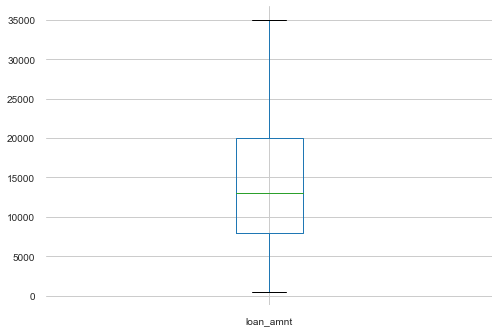

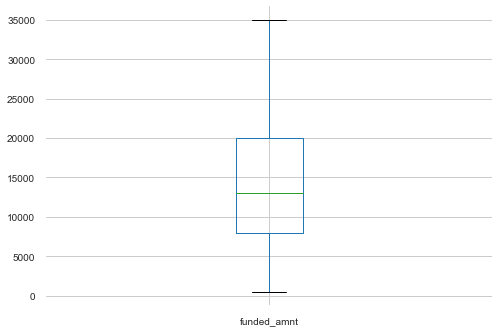

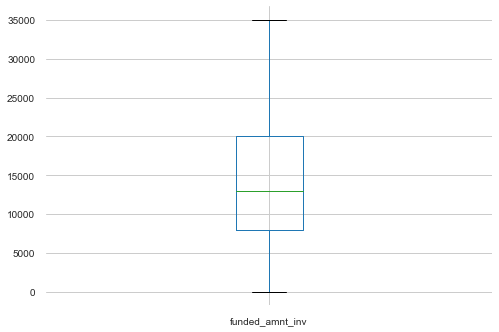

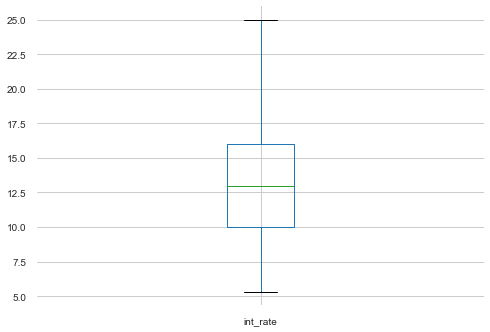

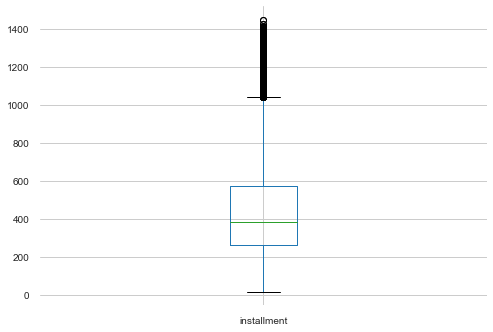

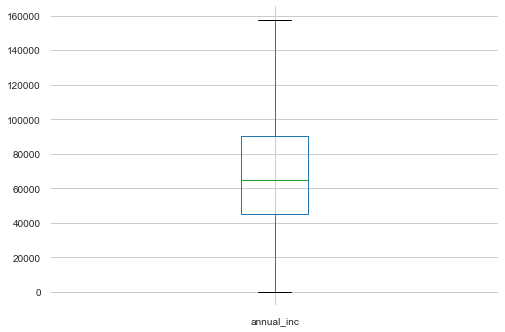

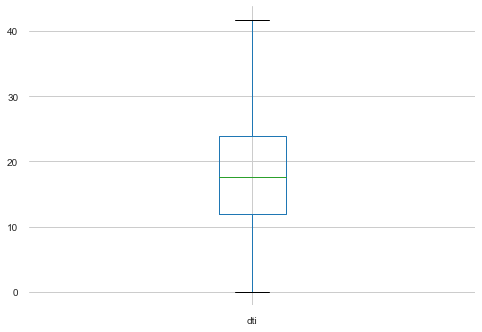

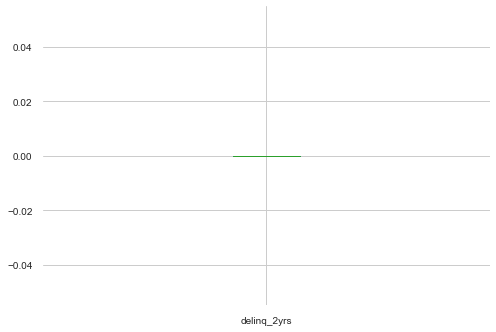

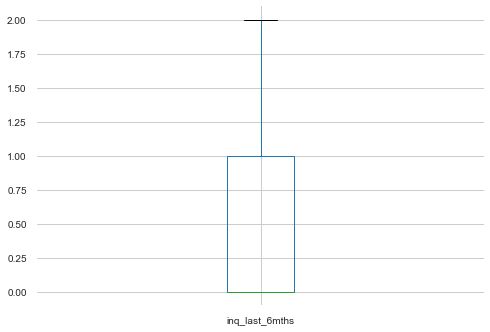

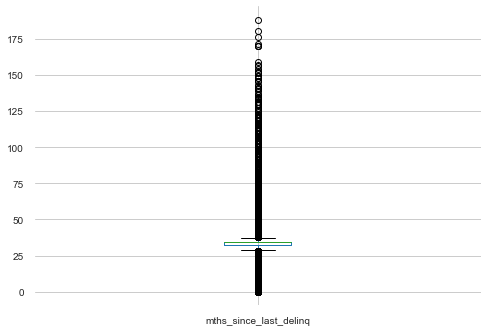

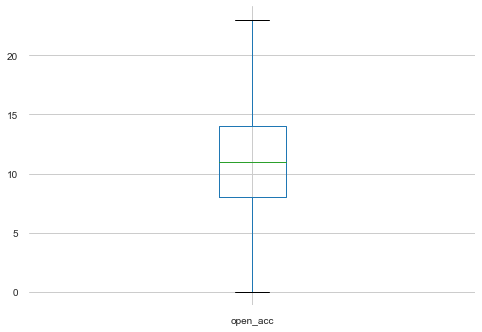

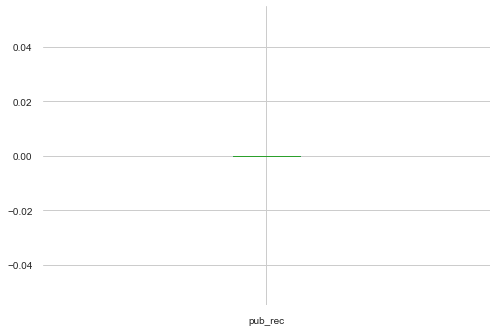

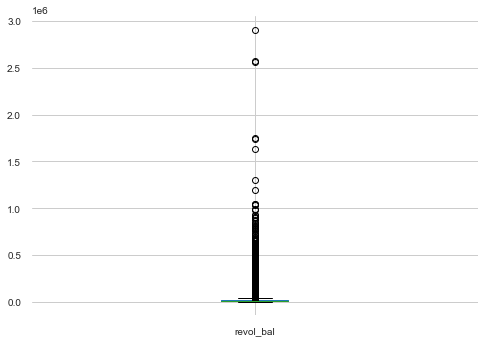

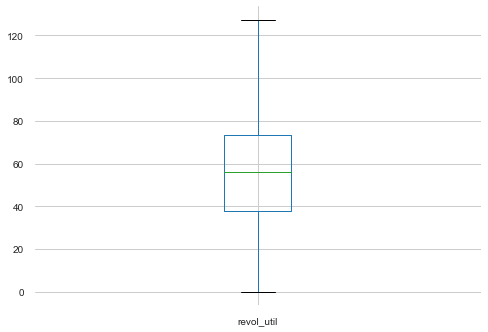

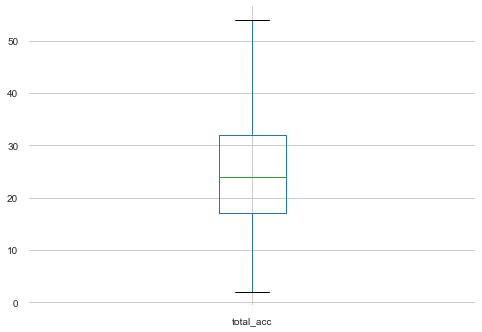

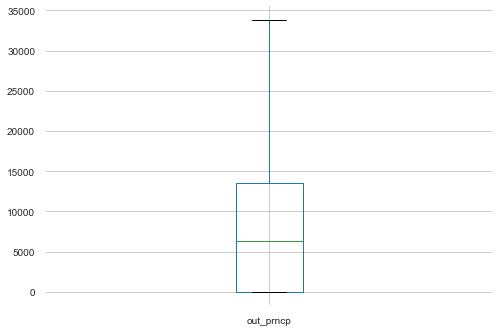

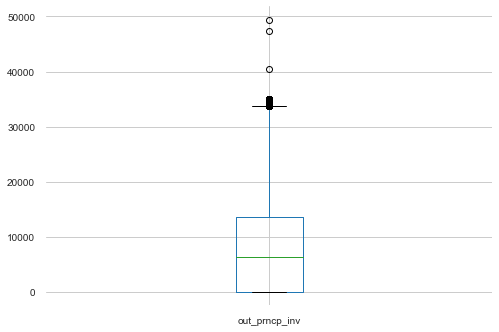

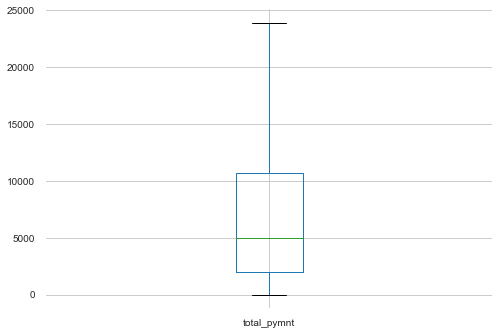

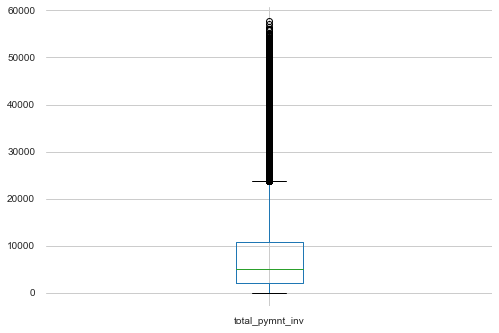

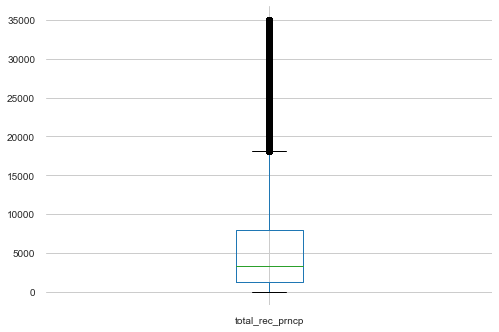

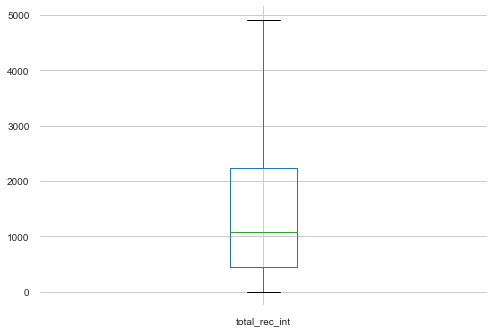

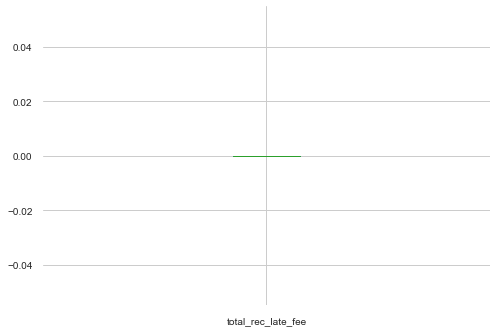

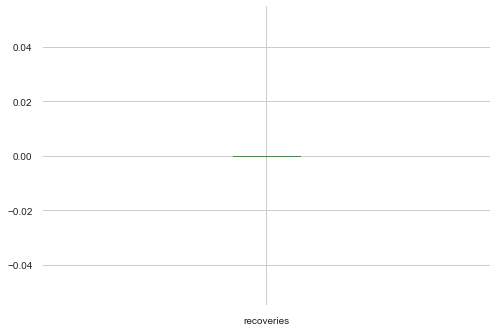

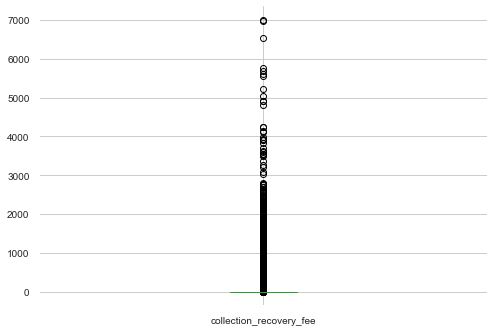

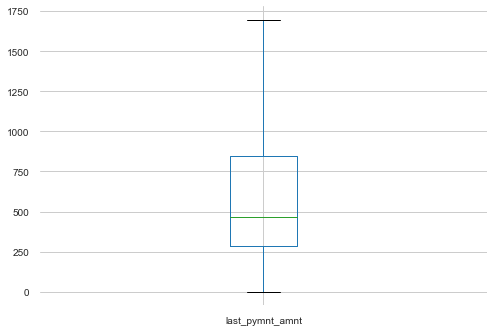

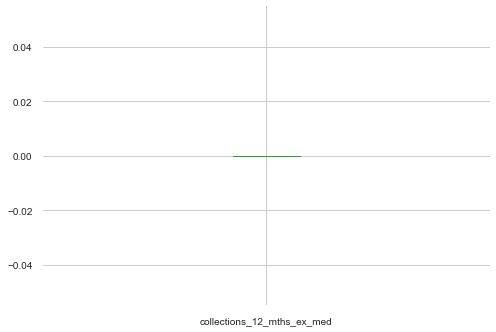

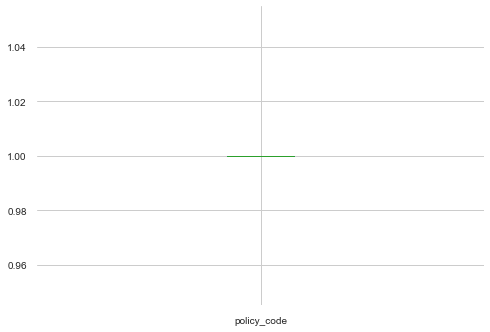

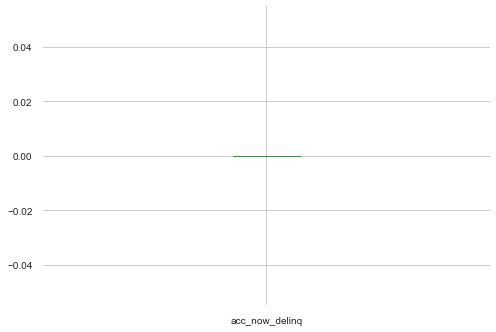

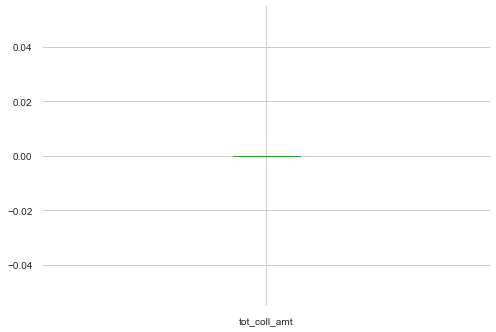

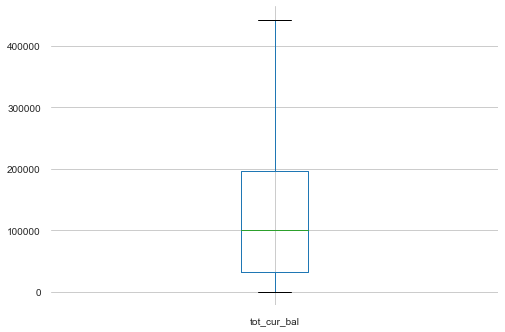

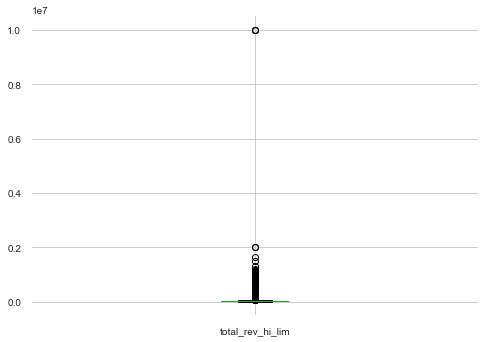

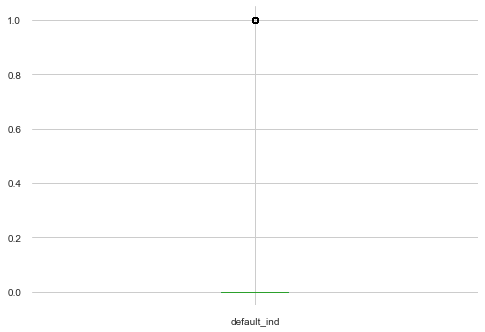

In [115]:
# Box plot each variable separately to see if we have outliers on them after capping.
for i in bankdata.describe().columns:
    bankdata.boxplot(column=i)
    plt.show()

 <font color='navy'><center><h1>Feature Scaling</center></font>

### <font color='maroon'>  Encoding the categorical features of the dataset

<font color='maroon'> #### <font color='maroon'>Using label encoder to convert the object data types into numeric data type.

In [59]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 51 columns):
loan_amnt                     855969 non-null int64
funded_amnt                   855969 non-null int64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null object
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null object
sub_grade                     855969 non-null object
emp_title                     855969 non-null object
emp_length                    855969 non-null object
home_ownership                855969 non-null object
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
issue_d                       855969 non-null object
pymnt_plan                    855969 non-null object
purpose                       855969 non-null object
title                         855969 no

In [116]:
# label endcoding for the object datatypes except the column "issue_d"
for col in ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
            'verification_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
            'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
            'last_credit_pull_d', 'application_type']:
    if (bankdata[col].dtype == 'object'):
        le = preprocessing.LabelEncoder()
        le = le.fit(bankdata[col])
        bankdata[col] = le.transform(bankdata[col])
        print('Completed Label encoding on',col)

Completed Label encoding on term
Completed Label encoding on grade
Completed Label encoding on sub_grade
Completed Label encoding on emp_title
Completed Label encoding on emp_length
Completed Label encoding on home_ownership
Completed Label encoding on verification_status
Completed Label encoding on pymnt_plan
Completed Label encoding on purpose
Completed Label encoding on title
Completed Label encoding on zip_code
Completed Label encoding on addr_state
Completed Label encoding on earliest_cr_line
Completed Label encoding on initial_list_status
Completed Label encoding on last_pymnt_d
Completed Label encoding on next_pymnt_d
Completed Label encoding on last_credit_pull_d
Completed Label encoding on application_type


#### <font color='maroon'> understanding the correlation between the features of the dataset to reduce the errors of multi collinearity

In [121]:
# get the correlation between the features of the dataset to ensure we do not have multi-colinearity issue
corr = bankdata.corr()
corr


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
loan_amnt,1.000000,0.999265,0.997601,0.411192,0.136590,0.944870,0.150866,0.156731,-0.041701,-0.030468,-0.196507,0.487408,0.281637,0.000761,-0.156933,-0.132110,-0.005332,0.015798,0.043493,NaN,-0.019378,-0.035197,-0.027138,0.202407,NaN,0.337489,0.119759,0.228026,0.085440,0.626876,0.639786,0.362549,0.480328,0.395880,0.489636,NaN,NaN,0.055135,-0.023826,0.585471,-0.020473,-0.042010,NaN,NaN,0.011044,NaN,NaN,0.297388,0.299986,-0.004907
funded_amnt,0.999265,1.000000,0.998485,0.410209,0.136711,0.945903,0.150698,0.156479,-0.041545,-0.030578,-0.196353,0.487175,0.281071,0.000766,-0.157872,-0.133240,-0.005292,0.015935,0.044317,NaN,-0.019390,-0.035514,-0.027184,0.202858,NaN,0.337405,0.120271,0.227951,0.087014,0.628803,0.641709,0.361095,0.479172,0.394669,0.488979,NaN,NaN,0.054898,-0.024568,0.585414,-0.020782,-0.043360,NaN,NaN,0.011087,NaN,NaN,0.297347,0.300194,-0.005797
funded_amnt_inv,0.997601,0.998485,1.000000,0.410575,0.136939,0.944149,0.149884,0.155633,-0.041143,-0.030984,-0.196351,0.486332,0.281529,0.000752,-0.159804,-0.135673,-0.005168,0.016074,0.046211,NaN,-0.019439,-0.036312,-0.026260,0.203469,NaN,0.336870,0.121054,0.228164,0.090470,0.631163,0.644023,0.357844,0.478589,0.391010,0.486678,NaN,NaN,0.053082,-0.025407,0.583961,-0.021631,-0.045807,NaN,NaN,0.011114,NaN,NaN,0.296533,0.299884,-0.008209
term,0.411192,0.410209,0.410575,1.000000,0.419126,0.143864,0.444810,0.454119,-0.017227,-0.016401,-0.111044,0.124602,0.168264,-0.000522,-0.053805,-0.059859,-0.028444,0.024664,0.107166,NaN,-0.002263,-0.004167,-0.006008,0.087225,NaN,0.093388,0.086013,0.104018,0.132658,0.388939,0.391187,0.043422,0.085087,-0.023870,0.323776,NaN,NaN,0.038079,-0.031973,0.043134,-0.024267,-0.047486,NaN,NaN,0.011003,NaN,NaN,0.132066,0.062167,0.031378
int_rate,0.136590,0.136711,0.136939,0.419126,1.000000,0.121916,0.934352,0.957411,0.021974,0.001025,0.063470,-0.111970,0.247565,0.000910,0.145199,0.094074,-0.000260,0.006257,0.164941,NaN,0.004658,0.204811,-0.020442,-0.015742,NaN,-0.035663,0.276322,-0.047655,-0.116268,0.022292,0.027141,0.127778,0.174990,0.061528,0.380176,NaN,NaN,0.072665,0.035627,0.097527,-0.001514,0.051720,NaN,NaN,0.008867,NaN,NaN,-0.091204,-0.161484,0.154182
installment,0.944870,0.945903,0.944149,0.143864,0.121916,1.000000,0.127902,0.133779,-0.036461,-0.025619,-0.163392,0.463653,0.275346,0.001359,-0.138233,-0.113955,0.004367,0.008975,0.029504,NaN,-0.019136,-0.007797,-0.029587,0.187113,NaN,0.320017,0.132032,0.204780,0.028699,0.528205,0.539835,0.403503,0.521332,0.455444,0.473543,NaN,NaN,0.057180,-0.009493,0.635674,-0.014025,-0.021450,NaN,NaN,0.009086,NaN,NaN,0.257742,0.275535,0.004753
grade,0.150866,0.150698,0.149884,0.444810,0.934352,0.127902,1.000000,0.976346,0.022126,-0.000686,0.060878,-0.098052,0.230367,0.000782,0.149569,0.048413,-0.004217,0.006861,0.171313,NaN,0.005410,0.187952,-0.021950,-0.006941,NaN,-0.030111,0.248441,-0.042521,-0.070625,0.107396,0.112455,0.029534,0.087032,-0.020454,0.301661,NaN,NaN,0.065834,0.007921,0.065930,-0.012597,0.012451,NaN,NaN,0.013054,NaN,NaN,-0.083529,-0.144384,0.123656
sub_grade,0.156731,0.156479,0.155633,0.454119,0.957411,0.133779,0.976346,1.000000,0.022666,-0.000543,0.063947,-0.100409,0.242899,0.000803,0.153500,0.049968,-0.003733,0.007436,0.176517,NaN,0.005393,0.194364,-0.022566,-0.007948,NaN,-0.029393,0.259059,-0.043949,-0.066184,0.109335,0.114539,0.033720,0.092489,-0.017631,0.312

<Figure size 1800x1800 with 0 Axes>

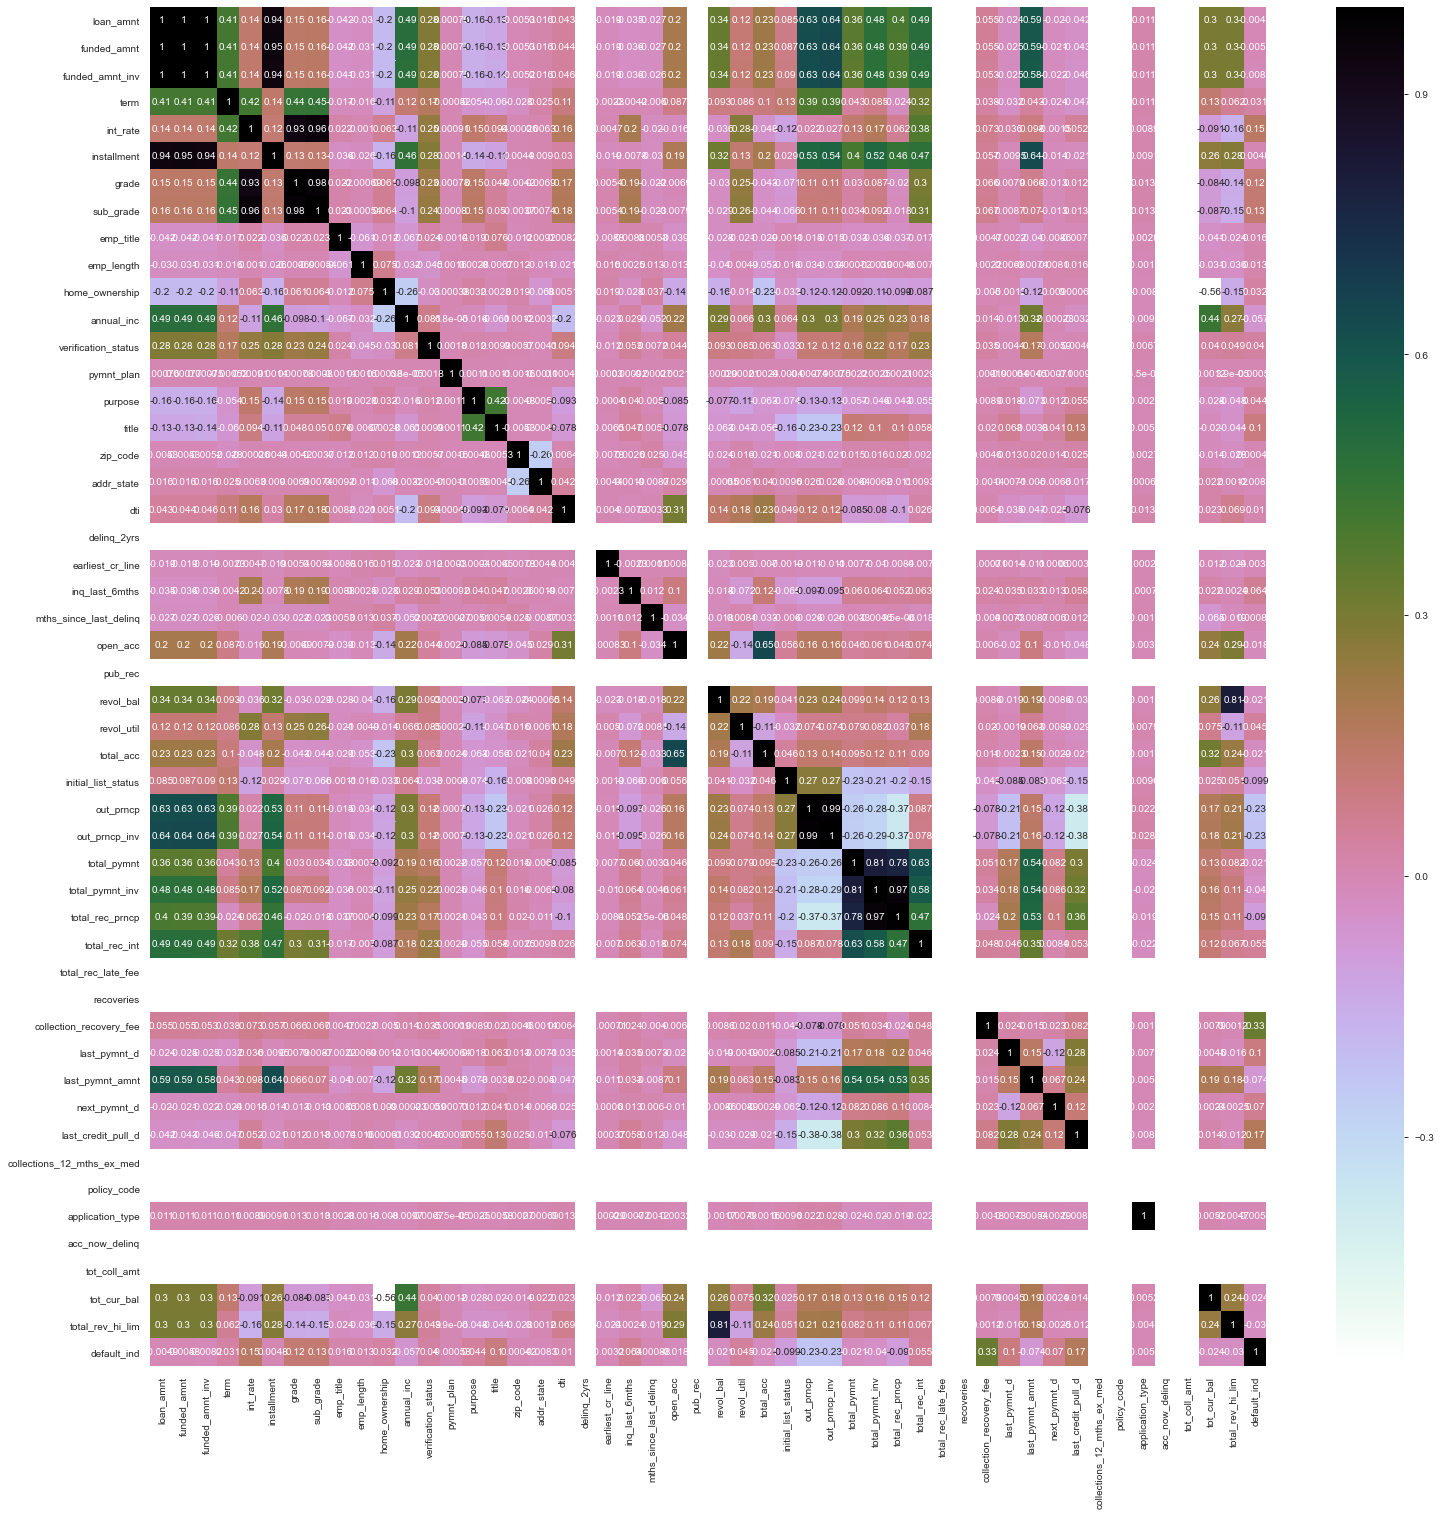

In [119]:
# corelation plot for all the features of the dataset
plt.figure(figsize=(25,25))
sns.heatmap(corr,
            annot=True,
            cmap='cubehelix_r')
plt.show()

In [122]:
# determine which all features have a correlation value of more than 0.8
for i in corr.index:
#    col_names = corr.columns
    for j in corr.columns:
        if corr[i][j] >= 0.8 and i != j:
            print('Correlation value of',i,'and',j,'is',corr[i][j])

Correlation value of loan_amnt and funded_amnt is 0.9992648053414029
Correlation value of loan_amnt and funded_amnt_inv is 0.9976005993260147
Correlation value of loan_amnt and installment is 0.9448702711504807
Correlation value of funded_amnt and loan_amnt is 0.9992648053414029
Correlation value of funded_amnt and funded_amnt_inv is 0.9984846499611634
Correlation value of funded_amnt and installment is 0.9459034825395108
Correlation value of funded_amnt_inv and loan_amnt is 0.9976005993260147
Correlation value of funded_amnt_inv and funded_amnt is 0.9984846499611634
Correlation value of funded_amnt_inv and installment is 0.9441486241392416
Correlation value of int_rate and grade is 0.9343516647778505
Correlation value of int_rate and sub_grade is 0.9574106199482925
Correlation value of installment and loan_amnt is 0.9448702711504807
Correlation value of installment and funded_amnt is 0.9459034825395108
Correlation value of installment and funded_amnt_inv is 0.9441486241392416
Correlat

In [123]:
#lis=data[data.columns].corr()['default_ind'][:]
bankdata[bankdata.columns].corr()['default_ind'][:]

loan_amnt                    -0.004907
funded_amnt                  -0.005797
funded_amnt_inv              -0.008209
term                          0.031378
int_rate                      0.154182
installment                   0.004753
grade                         0.123656
sub_grade                     0.126923
emp_title                     0.016211
emp_length                    0.013198
home_ownership                0.032341
annual_inc                   -0.056920
verification_status           0.039585
pymnt_plan                   -0.000579
purpose                       0.043574
title                         0.101313
zip_code                      0.000424
addr_state                   -0.008272
dti                           0.010132
delinq_2yrs                        NaN
earliest_cr_line             -0.003211
inq_last_6mths                0.063526
mths_since_last_delinq        0.000883
open_acc                     -0.018388
pub_rec                            NaN
revol_bal                

#### <font color='maroon'> drop the features which has high correlation value to avoid the issues of multi-collinearity

In [124]:
# drop the features with high correlation values
bankdata = bankdata.drop(['policy_code',
                          'delinq_2yrs',
                          'pub_rec',
                          'collections_12_mths_ex_med',
                          'acc_now_delinq',
                          'tot_coll_amt', 
                          'total_rec_late_fee',
                          'recoveries',
                         'funded_amnt',
                               'funded_amnt_inv',
                               'installment',
                               'grade',
                               'sub_grade',
                               'total_rev_hi_lim',
                               'out_prncp_inv',
                               'total_pymnt_inv',
                               'total_rec_prncp',
                               'collection_recovery_fee',
                               'revol_bal'],axis=1)

In [125]:
corr = bankdata.corr()
# determine which all features have a correlation value of more than 0.8
for i in corr.index:
#    col_names = corr.columns
    for j in corr.columns:
        if corr[i][j] >= 0.8 and i != j:
            print('Correlation value of',i,'and',j,'is',corr[i][j])
print('No feature with high correlation value was found on dataset')

No feature with high correlation value was found on dataset


In [127]:
bankdata.shape

(855969, 32)

 <font color='navy'><center><h1>EDA-data visualization</center></font>

#### <font color='maroon'> Getting the count of application types

In [154]:
bankdata['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

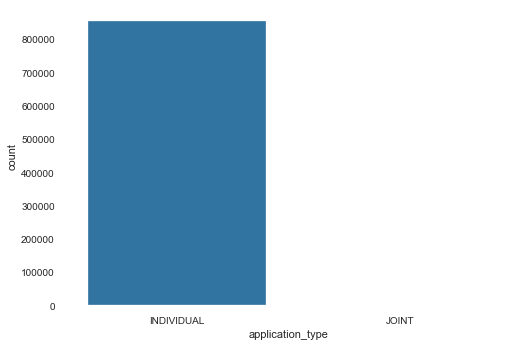

In [155]:
sns.countplot('application_type',data=bankdata)

<font color='royalblue'> We can see above that the applications for individual loan is more than the joint loans.

In [156]:
df=bankdata.groupby('application_type')
df['default_ind'].value_counts()

application_type  default_ind
INDIVIDUAL        0              809060
                  1               46467
JOINT             0                 442
Name: default_ind, dtype: int64

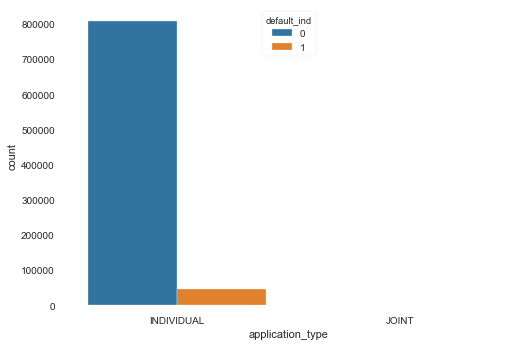

In [167]:
sns.countplot('application_type',data=bankdata,hue='default_ind')

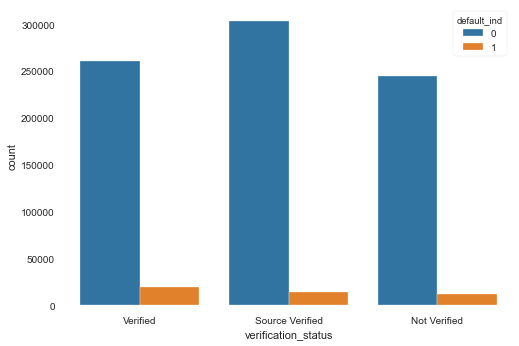

In [168]:
sns.countplot('verification_status',data=bankdata,hue='default_ind')

<font color='royalblue'> It is observed that more number of applicants are source verified however, the number of defaulted is more for the verified category of applicants.

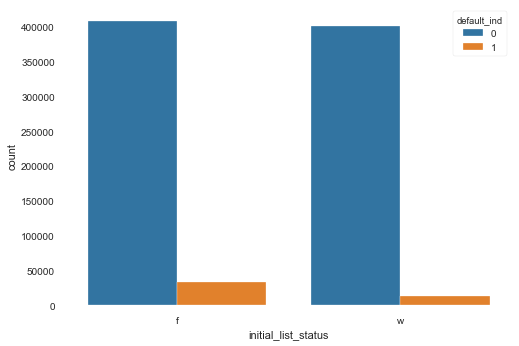

In [169]:
sns.countplot('initial_list_status',data=bankdata,hue='default_ind')

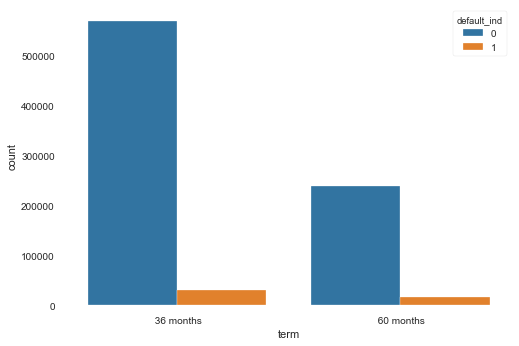

In [170]:
sns.countplot('term',data=bankdata,hue='default_ind')

<font color='royalblue'> It is observed that loan appliers with less term '36 months' are tend to default more.

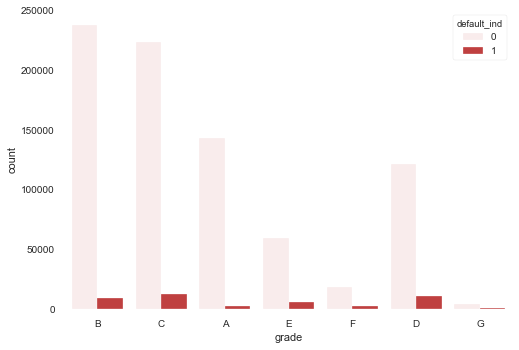

In [171]:
sns.countplot('grade',data=bankdata,hue='default_ind',color='red',saturation=0.5)

<font color='royalblue'> It is observed that grage B applicants received more number of loans however, the number of defaulters is higher in grade C and grade D applicants.

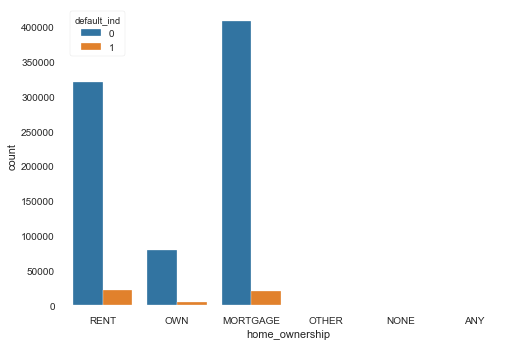

In [172]:
sns.countplot('home_ownership',data=bankdata,hue='default_ind')

<font color='royalblue'> It is observed that people who stays in rent and have to pay mortgage tend to default the loan more than the people who own a house.

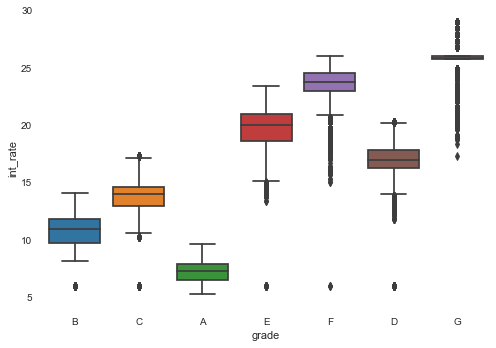

In [173]:
sns.boxplot('grade','int_rate',data=bankdata)

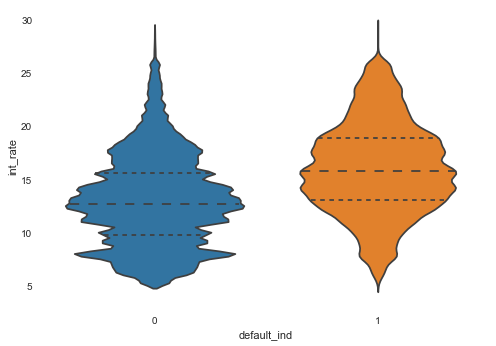

In [174]:
sns.violinplot('default_ind','int_rate',data=bankdata,bw='scott',inner='quartile')

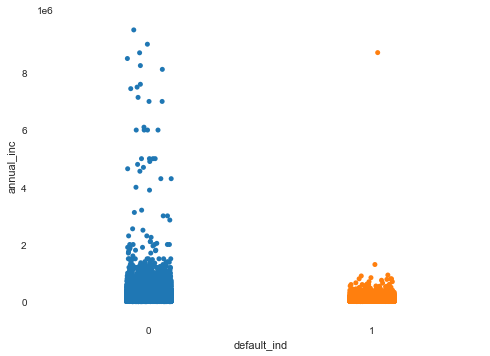

In [175]:
sns.stripplot('default_ind','annual_inc',data=bankdata,jitter=True)

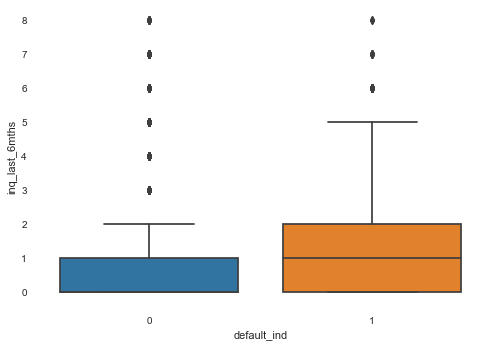

In [176]:
sns.boxplot('default_ind','inq_last_6mths',data=bankdata)

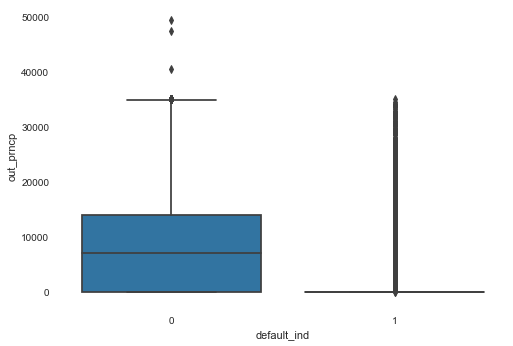

In [177]:
sns.boxplot('default_ind','out_prncp',data=bankdata)

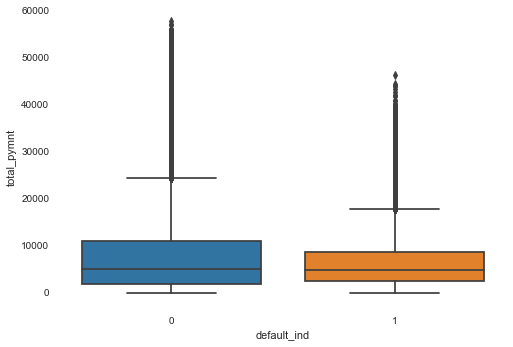

In [178]:
sns.boxplot('default_ind','total_pymnt',data=bankdata)

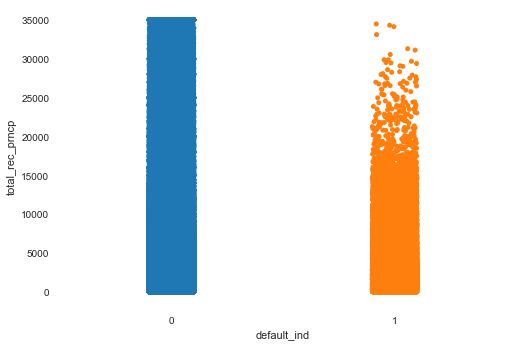

In [179]:
sns.stripplot('default_ind','total_rec_prncp',data=bankdata,jitter=True)

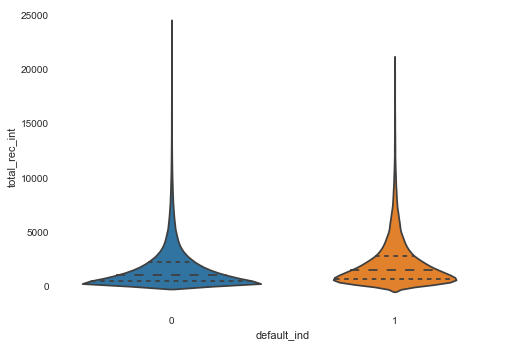

In [181]:
sns.violinplot('default_ind','total_rec_int',data=bankdata,inner='quartile')

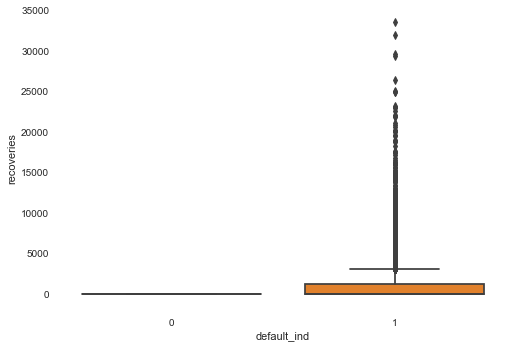

In [182]:
sns.boxplot('default_ind','recoveries',data=bankdata)

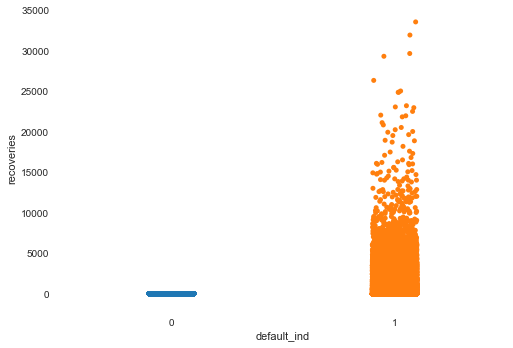

In [183]:
sns.stripplot('default_ind','recoveries',data=bankdata,jitter=True)


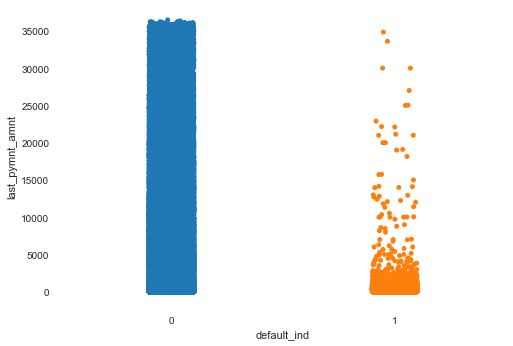

In [185]:
sns.stripplot('default_ind','last_pymnt_amnt',data=bankdata,jitter=True)

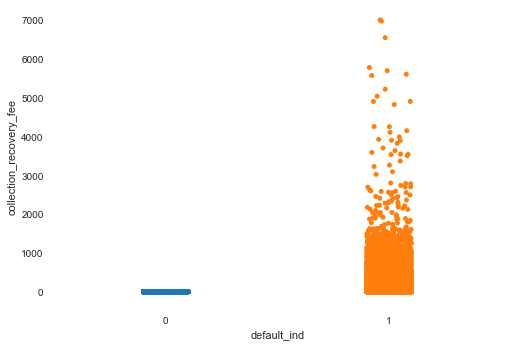

In [184]:
sns.stripplot('default_ind','collection_recovery_fee',data=bankdata,jitter=True)

<Figure size 1800x360 with 0 Axes>

Text(0.5, 1.0, 'graph')

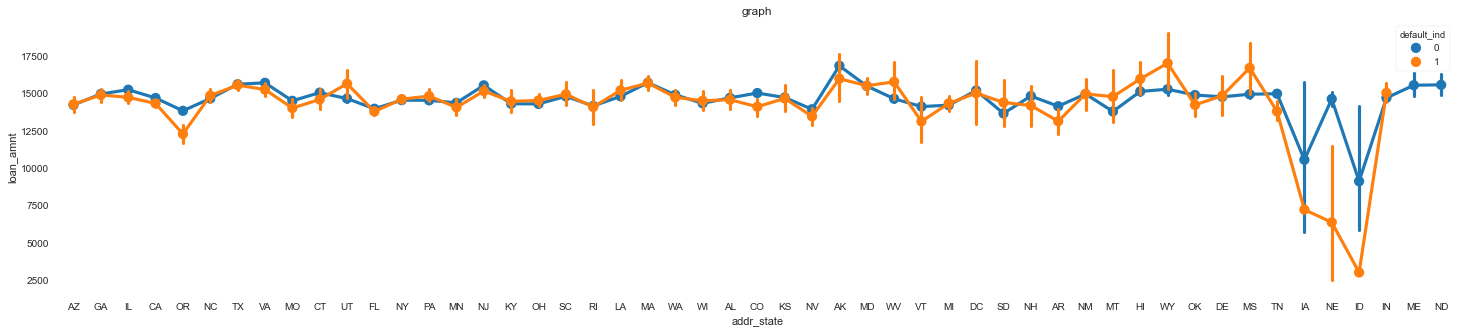

In [191]:
# how did each of the states perform when it comes to borrowing the money
plt.figure(figsize=(25, 5))
plt.title('graph')
sns.pointplot(x='addr_state', y='loan_amnt', hue='default_ind', data=bankdata)

<font color='royalblue'> We can see in the above plot that the loans were defaulted in most of the states regardless the loan amount. However, there are few states like Iowa, Idiaho, Indiana, Orlando where the loans were defaulted for a lower borrowed amount.

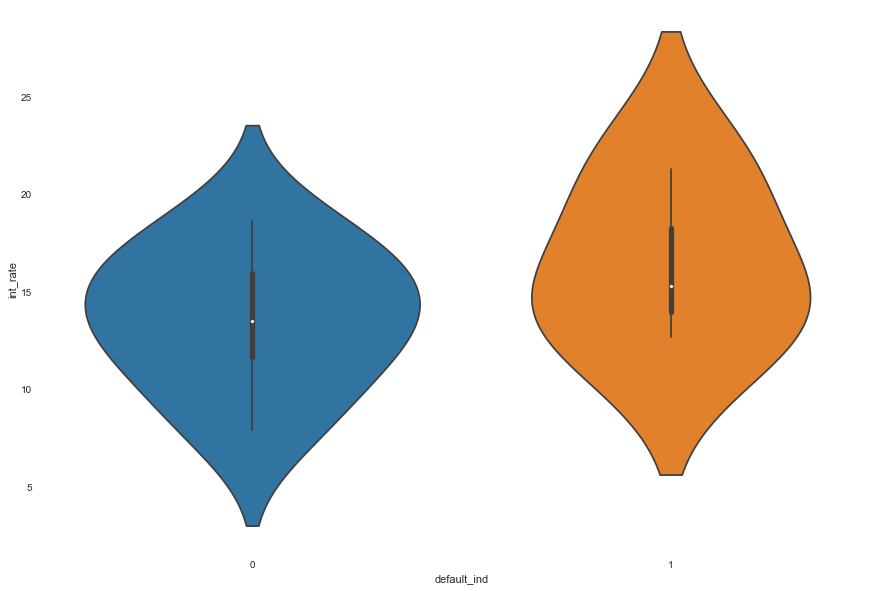

In [194]:
# draw a violin chart to see if the interest rate of the loan has any relationship with the default indicator
fig=plt.figure(figsize=(15,10))
sns.violinplot(y="int_rate", x="default_ind", data=bankdata[:10]);

<font color='royalblue'> the above graph clearly states that the people tend to default the loan when the interest rate is on the higher side (specially around 25 or more). Whereas people did not default the loan when the same was on the lower side (round 5 or less). So, higher interest rate is one of the reason that people default the loan.

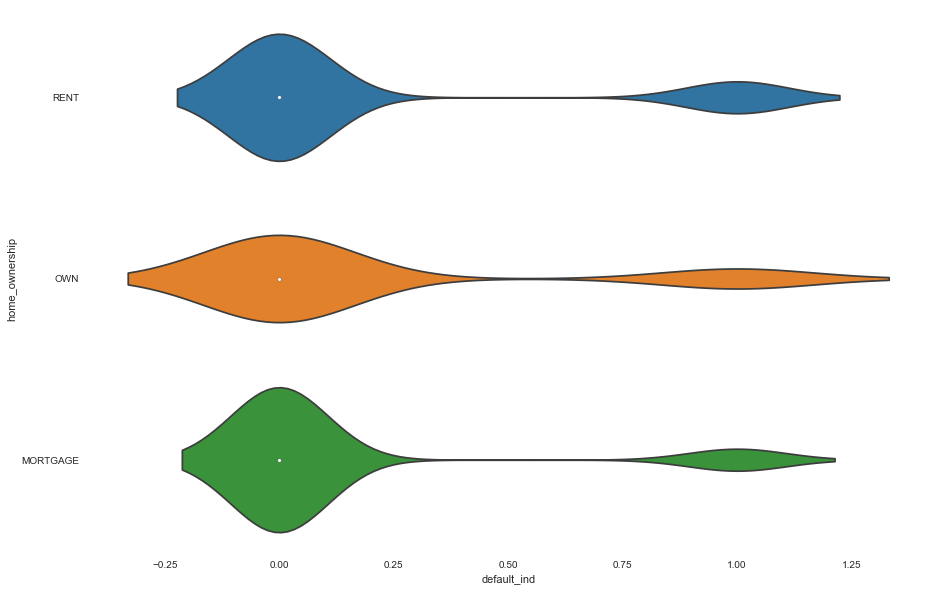

In [195]:
# plot a graph of the defaulting nature of people against the type of their home ownership
fig=plt.figure(figsize=(15,10))
sns.violinplot(y="home_ownership", x="default_ind", data=bankdata[:1000]);

<font color='royalblue'> when we try to establish a relationship between the type of home ownership and nature of defaulting the loan, we do not see a specific trend.

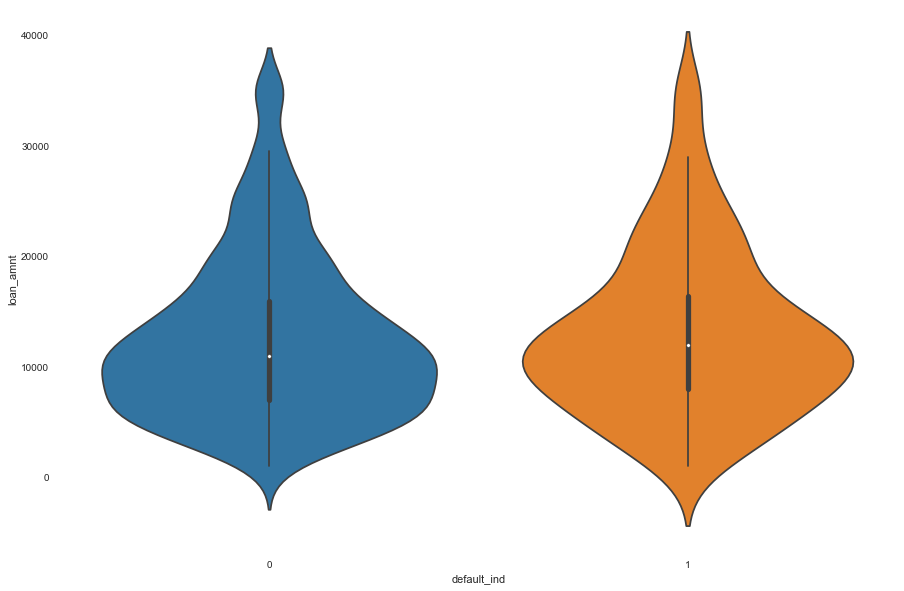

In [198]:
# plot the relationship between the default indicator and the amount of loan that was issued
fig=plt.figure(figsize=(15,10))
sns.violinplot(x="default_ind", y="loan_amnt", data=bankdata[:1000]);

<font color='royalblue'> as we can see here clearly that the amount of loan does not have any direct relationship with the tendency of defaulting the loan. people have defaulted the loan for very smally amounts as well as large ammounts also.

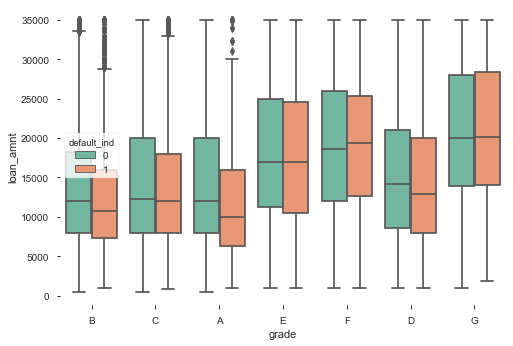

In [202]:
# box plot the amount of loan issued as per the customer grade with the bifircation of default indicator
sns.set_style("ticks") 
sns.boxplot(x = 'grade', 
           y = 'loan_amnt', 
           hue='default_ind',
           palette="Set2",
           data = bankdata)

<font color='royalblue'> we can see here that the grade B customers were alloted the least amount of loans whereas grage G customer received the higher amounts. Also, it is seen that the grade A customers had the lowest tendency to default the loan.

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'number of loans issued per state')

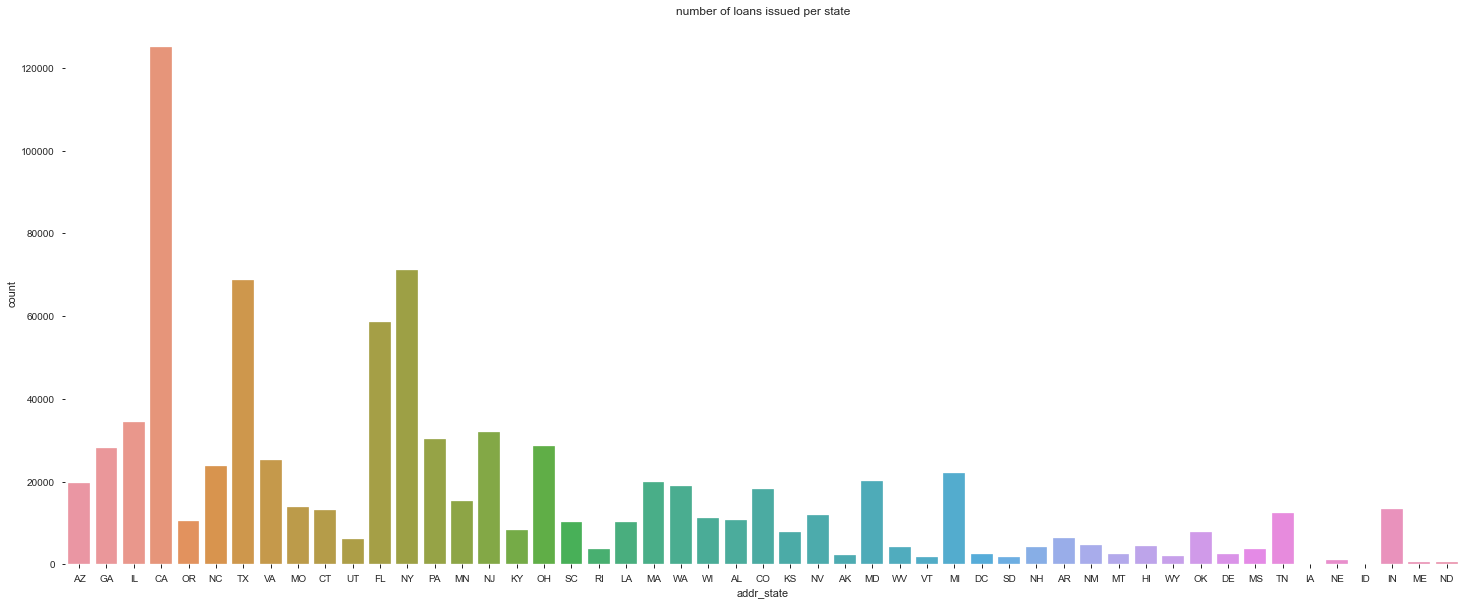

In [204]:
# count of loans issued in various states
plt.figure(figsize=(25, 10))
plt.title('number of loans issued per state')
sns.countplot(x='addr_state', data=bankdata)

<font color='royalblue'> it can be easily seen that the number of loans issued in California is way too much in compared to the same from other states. This is quite obvious going by the population that the state carry.

(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17754fc2888>)

Text(0.5, 1.0, 'interest rate across the grade of customers')

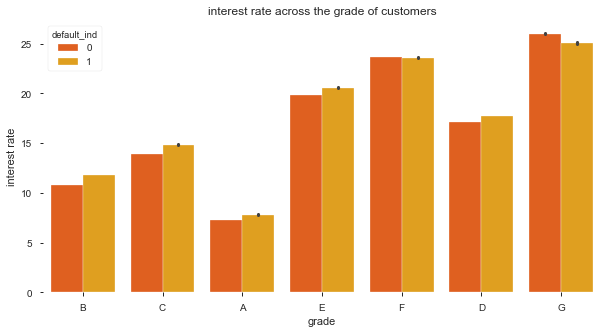

In [206]:
# distribution of interest rate against the grade of the customer
plt.subplots(figsize=(10, 5))
g = sns.barplot(x='grade',y='int_rate',data=bankdata,hue='default_ind',palette='autumn')
g = g.set_ylabel("interest rate")
plt.title('interest rate across the grade of customers')
plt.show()

<font color='royalblue'> this graph clearly states that the people who has defaulted the loan are those whose interest rate is higher. Besides, when we talk about group G, the people who defaulted the loan were actually having lesser interest rate when compared to the people who paid off the loan.

 <font color='navy'><center><h1>Preparing the data to feed to the models</center></font>

In [129]:
# sort the dataset based on issue_date before splitting it into train and test subsets
bankdata['str_split'] = bankdata.issue_d.str.split('-')
bankdata['dd'] = bankdata.str_split.str.get(0)
bankdata['mm'] = bankdata.str_split.str.get(1)
bankdata['yyyy'] = bankdata.str_split.str.get(2)

bankdata["new_issue_d"] = bankdata["yyyy"].map(str) + bankdata["mm"] + bankdata["dd"]
bankdata_sort = bankdata.sort_values('new_issue_d')

bankdata_sort_index = bankdata_sort.set_index('new_issue_d')

work_data = bankdata_sort_index.drop(['issue_d','str_split','dd','mm','yyyy'], axis=1)

In [130]:
bankdata.head()

,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,tot_cur_bal,default_ind,str_split,dd,mm,yyyy,new_issue_d
0,5000,0,10.65,222432,1,5,24000.0,2,01-12-2011,0,1,8573,805,3,27.65,38,1,34.149943,3,83.7,9,0,0.0,5861.071414,861.07,7,171.62,1,8,0,139766.247529,0,"[01, 12, 2011]",01,12,2011,20111201
1,2500,1,15.27,186160,10,5,30000.0,1,01-12-2011,0,0,48115,295,10,1.00,217,1,34.149943,3,9.4,4,0,0.0,1008.710000,435.17,30,119.66,1,74,0,139766.247529,1,"[01, 12, 2011]",01,12,2011,20111201
2,2400,0,15.96,222432,1,5,12252.0,0,01-12-2011,0,11,58620,568,14,8.72,628,2,34.149943,2,98.5,10,0,0.0,3003.653644,603.65,47,649.91,1,8,0,139766.247529,0,"[01, 12, 2011]",01,12,2011,20111201
3,10000,0,13.49,3163,1,5,49200.0,1,01-12-2011,0,9,58307,851,4,20.00,103,1,35.000000,10,21.0,37,0,0.0,12226.302210,2209.33,7,357.48,1,7,0,139766.247529,0,"[01, 12, 2011]",01,12,2011,20111201
4,3000,1,12.69,235305,0,5,80000.0,1,01-12-2011,0,9,38024,904,37,17.94,49,0,38.000000,15,53.9,38,0,766.9,3242.170000,1009.07,8,67.79,1,8,0,139766.247529,0,"[01, 12, 2011]",01,12,2011,20111201


In [131]:
work_data.head()

,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,tot_cur_bal,default_ind
new_issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20070601,7500,0,13.75,80191,10,4,22000.0,0,0,2,10132,19,19,14.29,569,0,11.0,7,51.5,8,0,0.0,9194.98,1694.98,43,256.59,1,44,0,139766.247529,0
20070701,5000,0,7.43,155048,8,1,150000.0,0,0,4,33519,289,10,0.00,672,0,0.0,2,19.5,19,0,0.0,5174.17,174.17,0,849.16,1,41,0,139766.247529,0
20070701,5750,0,7.43,82082,1,1,125000.0,0,0,2,49624,12,19,0.27,40,0,0.0,10,10.2,16,0,0.0,6421.50,671.50,35,4.74,1,26,0,139766.247529,0
20070701,5000,0,7.43,149424,6,5,40000.0,0,0,0,491,513,48,2.55,92,2,0.0,4,14.0,7,0,0.0,5593.39,593.39,59,158.65,1,90,0,139766.247529,0
20070701,1200,0,11.54,75143,10,5,20000.0,0,0,1,3824,33,21,2.04,281,2,24.0,3,75.8,4,0,0.0,1425.37,225.37,51,39.45,1,53,0,139766.247529,0


#### <font color='maroon'> split the dataset into train and test with issue date = 2015-06-01 being the criteria for split

In [135]:
# split the dataset into train and test based on the loan issue date
train = work_data.loc['20070601':'20150501',:]
test  = work_data.loc['20150601':'20151201',:]

#### <font color='maroon'> separate the independent and dependent featurs on both train and test files for data models

In [137]:
# separating the independent features from the dependent feature to feed the dataset to the model
x_train = train.drop(['default_ind'],axis=1)
x_test  = test.drop(['default_ind'],axis=1)
y_train = train['default_ind']
y_test = test['default_ind']

# <font color='maroon'><h3><i><u>Data Models

## <font color='maroon'> Random Forest

In [138]:
# define function for creating ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='darkred', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The score of this random forest on TRAIN is :  100.0 %
The score of this random forest on TEST is :  98.36 %


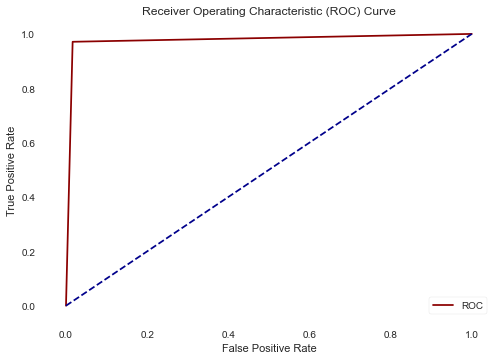

AUC Random Forest: 0.98


In [140]:
from sklearn.ensemble import RandomForestClassifier # random forest model

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

# prediction on train data
rfc_prediction_train = rfc.predict(x_train)
rfc_score_train=accuracy_score(y_train,rfc_prediction_train) # here y_test is actual value and rfc_prediction is predicted value
print('The score of this random forest on TRAIN is : ',round(rfc_score_train * 100,2), '%')

# prediction on test data
rfc_prediction_test = rfc.predict(x_test)
rfc_score_test=accuracy_score(y_test,rfc_prediction_test) # here y_test is actual value and rfc_prediction is predicted value
print('The score of this random forest on TEST is : ',round(rfc_score_test * 100,2), '%')

# create the ROC curve for test data and print the AUC
auc = roc_auc_score(y_test, rfc_prediction_test)
fpr, tpr, thresholds = roc_curve(y_test, rfc_prediction_test)
plot_roc_curve(fpr, tpr)
print('AUC Random Forest: %.2f' % auc)

In [141]:
# getting the confusion matrix for the classification model
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,rfc_prediction_train))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,rfc_prediction_test))

Confusion Matrix TRAIN:
 [[552822      0]
 [     0  46156]]

Confusion Matrix TEST:
 [[252478   4202]
 [     9    302]]


In [142]:
# getting the classification report of the classification models
print ('Classification Report TRAIN:\n', classification_report(y_train,rfc_prediction_train))
print ('\nClassification Report TEST:\n', classification_report(y_test,rfc_prediction_test))

Classification Report TRAIN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Classification Report TEST:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.07      0.97      0.13       311

    accuracy                           0.98    256991
   macro avg       0.53      0.98      0.56    256991
weighted avg       1.00      0.98      0.99    256991



## <font color='maroon'> Logistic Regression

C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The score of this Logistic Regression on TRAIN is :  94.37 %
The score of this Logistic Regression on TEST is :  99.93 %


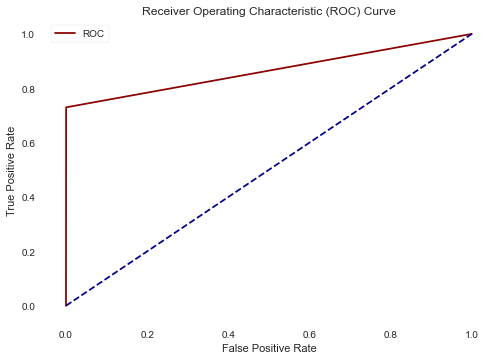

AUC Decision Tree: 0.86


In [143]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(x_train, y_train)

# prediction on train data
lgr_prediction_train = lgr.predict(x_train)
lgr_score_train=accuracy_score(y_train,lgr_prediction_train) # here y_test is actual value and rfc_prediction is predicted value

print('The score of this Logistic Regression on TRAIN is : ',round(lgr_score_train * 100,2), '%')

# prediction on test data
lgr_prediction_test = lgr.predict(x_test)
lgr_score_test=accuracy_score(y_test,lgr_prediction_test) # here y_test is actual value and rfc_prediction is predicted value

print('The score of this Logistic Regression on TEST is : ',round(lgr_score_test * 100,2), '%')

# create the ROC curve for test data and print the AUC
auc = roc_auc_score(y_test, lgr_prediction_test)
fpr, tpr, thresholds = roc_curve(y_test, lgr_prediction_test)
plot_roc_curve(fpr, tpr)
print('AUC Decision Tree: %.2f' % auc)

## <font color='maroon'>  Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

The score of this Decision Tree on TRAIN is :  100.0 %
The score of this Decision Tree on TEST is :  99.27 %


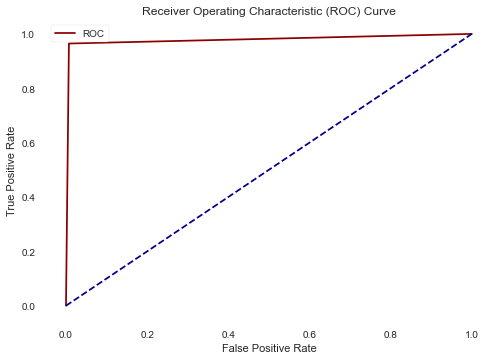

AUC Decision Tree: 0.98


In [144]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)

# prediction on train data
dtc_prediction_train = dtc.predict(x_train)
dtc_score_train=accuracy_score(y_train,dtc_prediction_train) # here y_test is actual value and rfc_prediction is predicted value
print('The score of this Decision Tree on TRAIN is : ',round(dtc_score_train * 100,2), '%')

# prediction on test data
dtc_prediction_test = dtc.predict(x_test)
dtc_score_test=accuracy_score(y_test,dtc_prediction_test) # here y_test is actual value and rfc_prediction is predicted value
print('The score of this Decision Tree on TEST is : ',round(dtc_score_test * 100,2), '%')

# create the ROC curve for test data and print the AUC
auc = roc_auc_score(y_test, dtc_prediction_test)
fpr, tpr, thresholds = roc_curve(y_test, dtc_prediction_test)
plot_roc_curve(fpr, tpr)
print('AUC Decision Tree: %.2f' % auc)

## <font color='maroon'>  XG-Boost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=300,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

The score of this XG-Boost on TRAIN is :  98.32 %
The score of this XG-Boost on TEST is :  99.99 %


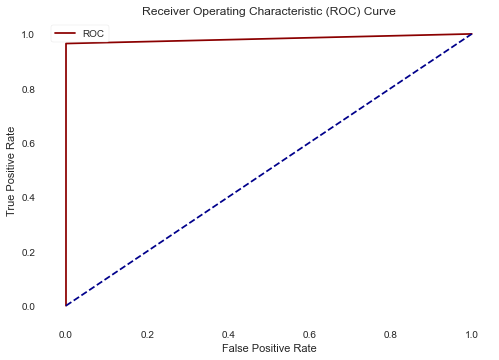

AUC XG-Boost: 0.98


In [145]:
import xgboost as xgb # EDA

xgboost = xgb.XGBClassifier(max_depth = 3, n_estimator = 300, learning_rate = 0.05)
xgboost.fit(x_train,y_train)

# prediction on train data
xgb_prediction_train = xgboost.predict(x_train)
xgb_score_train=accuracy_score(y_train,xgb_prediction_train) # here y_test is actual value and rfc_prediction is predicted value
print('The score of this XG-Boost on TRAIN is : ',round(xgb_score_train * 100,2), '%')

# prediction on test data
xgb_prediction_test = xgboost.predict(x_test)
xgb_score_test=accuracy_score(y_test,xgb_prediction_test) # here y_test is actual value and rfc_prediction is predicted value
print('The score of this XG-Boost on TEST is : ',round(xgb_score_test * 100,2), '%')

# create the ROC curve for test data and print the AUC
auc = roc_auc_score(y_test, xgb_prediction_test)
fpr, tpr, thresholds = roc_curve(y_test, xgb_prediction_test)
plot_roc_curve(fpr, tpr)
print('AUC XG-Boost: %.2f' % auc)

## <font color='maroon'> Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)

The score of this Naive-Bayes on TRAIN is :  87.68 %
The score of this Naive-Bayes on TEST is :  98.55 %


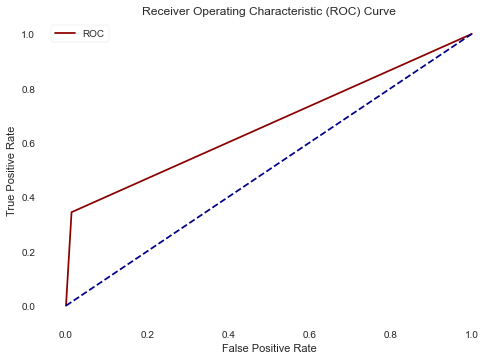

AUC Naive-Bayes: 0.67


In [146]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

# prediction on train data
gnb_prediction_train = gnb.predict(x_train)
gnb_score_train=accuracy_score(y_train,gnb_prediction_train) # here y_test is actual value and rfc_prediction is predicted value

print('The score of this Naive-Bayes on TRAIN is : ',round(gnb_score_train * 100,2), '%')

# prediction on test data
gnb_prediction_test = gnb.predict(x_test)
gnb_score_test=accuracy_score(y_test,gnb_prediction_test) # here y_test is actual value and rfc_prediction is predicted value

print('The score of this Naive-Bayes on TEST is : ',round(gnb_score_test * 100,2), '%')

# create the ROC curve for test data and print the AUC
auc = roc_auc_score(y_test, gnb_prediction_test)
fpr, tpr, thresholds = roc_curve(y_test, gnb_prediction_test)
plot_roc_curve(fpr, tpr)
print('AUC Naive-Bayes: %.2f' % auc)

## <font color='maroon'> reporting the accuracy of all the data models used for prediction

In [148]:
print('The accuracy scores of various models on XYZCorp_LendingData\n')
print('The score of this Random Forest on \t\tTRAIN:',round(rfc_score_train * 100,2), '\b%','\tTEST:',round(rfc_score_test * 100,2), '\b%')
print('The score of this XG-Boost on \t\t\tTRAIN:',round(xgb_score_train * 100,2), '\b%','\tTEST:',round(xgb_score_test * 100,2), '\b%')
print('The score of this Decision Tree on \t\tTRAIN:',round(dtc_score_train * 100,2), '\b%','\tTEST:',round(dtc_score_test * 100,2), '\b%')
print('The score of this Naive-Bayes on \t\tTRAIN:',round(gnb_score_train * 100,2), '\b%','\tTEST:',round(gnb_score_test * 100,2), '\b%')
print('The score of this Logistic Regression on \tTRAIN:',round(lgr_score_train * 100,2), '\b%','\tTEST:',round(lgr_score_test * 100,2), '\b%')


The accuracy scores of various models on XYZCorp_LendingData

The score of this Random Forest on 		TRAIN: 100.0 % 	TEST: 98.36 %
The score of this XG-Boost on 			TRAIN: 98.32 % 	TEST: 99.99 %
The score of this Decision Tree on 		TRAIN: 100.0 % 	TEST: 99.27 %
The score of this Naive-Bayes on 		TRAIN: 87.68 % 	TEST: 98.55 %
The score of this Logistic Regression on 	TRAIN: 94.37 % 	TEST: 99.93 %


## <font color='maroon'> From above report, we can see that XG-Boost has the highest accuracy. Hence, We will be using XGboost model while predicting further unknown test data.